#Estudio de Factores de Riesgo de Enfermedades Cardiovasculares

Como temática de proyecto final se eligió el estudio de factores de riesgo en enfermedades cardiovasculares. 

Como Objetivo General se decidió que debía ser el siguiente:
>Encontrar qué factores de riesgo estan asociados a la aparicion de enfermedades cardiacas. 

Existen muchos estudios sobre este tema, pero se decidió utilizar el **Estudio Framingham**.

##Integrantes:

- Jorge Francesco Ferdinand Meza Mallma
- Matias Gabriel Rogani

##Estudio Framingham de Enfermedades Cardiovasculares
El Estudio de Framingham o Estudio Framingham del Corazón (FHS) (en inglés Framingham Heart Study) es un estudio de cohortes de larga duración sobre el riesgo cardiovascular, que todavía se encuentra en marcha, realizado entre los residentes de Framingham, una ciudad del estado de Massachusetts en los Estados Unidos de América (EE. UU.).(1)

Este estudio se puso en marcha en 1948 con la participación inicial de 5.209 mujeres y hombres sanos de esta ciudad de entre 30 y 62 años, y en el que actualmente se incluye la tercera generación de participantes. Gracias a este estudio, que continúa siendo un referente en la actualidad, se dispone de diversos conocimientos sobre la epidemiología de los problemas cardiovasculares y los factores de riesgo asociados a su aparición.

Este estudio es uno de los primeros estudios prospectivos de base poblacional de la historia, pionero en la investigación epidemiológica de las enfermedades crónicas no infecciosas y en los métodos estadísticos y de análisis de datos  utilizados. Es por este motivo que ha tenido una amplia difusión en este campo.(2)







##Definiciones
###Factor de Riesgo
Toda circunstancia o situación que aumenta las probabilidades de una persona de contraer una enfermedad o cualquier otro problema de salud. Los factores de riesgo implican que las personas afectadas por dicho factor de riesgo, presentan un riesgo sanitario mayor al de las personas sin este factor.

##Fuente de Datos utilizada
El dataset utilizado es un dataset desarrollado por el Biologic Specimen and Data Repository Information Coordinating Center (BioLINCC)  utilizando el Estudio Framingham como fuente de datos. Corresponde a datos seleccionados del estudio original de cohortes Framingham, que cubre 3 ciclos de examen clínico los cuales corresponden a 20 años de seguimiento. El objetivo del dataset es el de aprendizaje, y no el desarrollo de publicaciones cientificas(3).
Este dataset fue modificado para la prediccion de pacientes con riesgo a 10 años de padecer una enfermedad coronaria, agregandosele una variable Target (TenYearCHD) y unificando los ciclos de examenes clinicos. El dataset esta alojado en Kaggle y es el utilizado es entre Trabajo.(4)


##Objetivos según el dataset hallado
> Encontrar qué factores de riesgo estan asociados a la aparicion de enfermedades cardíacas en un plazo de 10 años en la poblacion de Framingham, Massachusetts, entre los años 1968 y 1988.

##Diccionario de Datos
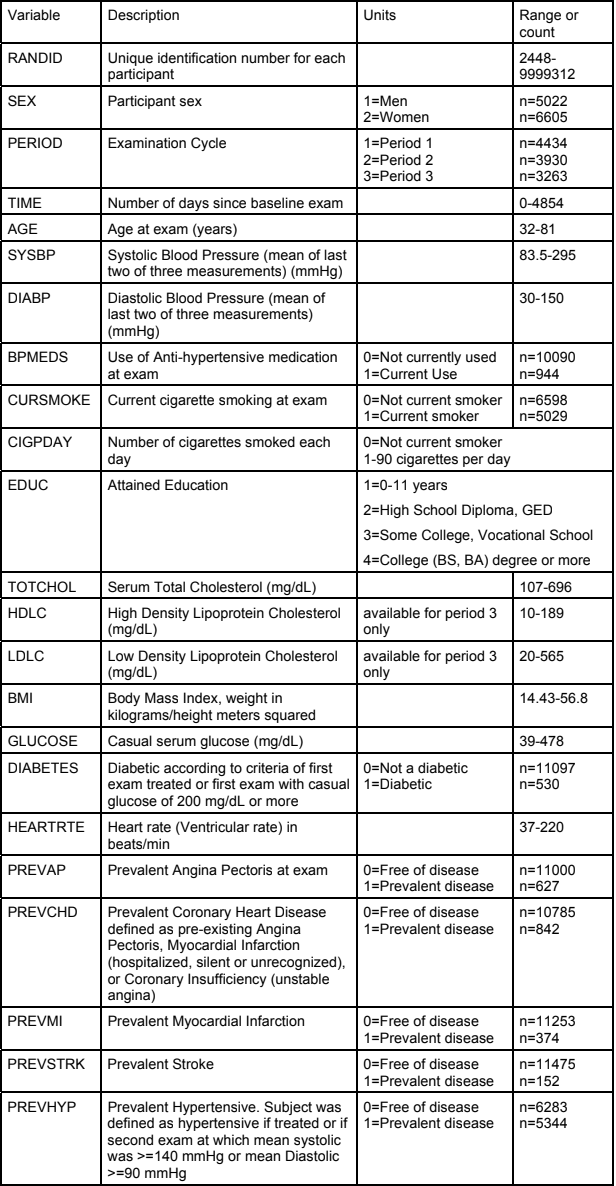


##Instalacion de Librerias

In [548]:
#Instalacion de librerias
  #Data Profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [549]:
#Librerias Utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib.ticker import FormatStrFormatter

#Librerias - Modelos de ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree


#Data Profiling
#import pandas_profiling

In [550]:
url = 'https://raw.githubusercontent.com/MatiasRogani/FraminghamStudy/main/framingham.csv'
df = pd.read_csv(url)

In [551]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [552]:
#Analizamos la forma del Dataframe
print('Este data set tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')

Este data set tiene 4240 filas, y 16 columnas


In [553]:
#Creamos los diccionarios en español para cada variable
male_dict = {1: 'masculino', 0:'femenino'}
currentSmoker_dict = {1:'fumador', 0:'no fumador'}
BPMeds_dict = {1:True, 0:False}

#df['male'] = df['male'].map(male_dict)
#df['currentSmoker'] = df['currentSmoker'].map(currentSmoker_dict)
#df['BPMeds'] = df['BPMeds'].map(BPMeds_dict)


In [554]:
#Creamos los diccionarios para cambiar titulos de columnas
c_dict = {
    'male': 'sexo',
    'age': 'edad',
    'education': 'educacion',
    'currentSmoker': 'Fumador',
    'cigsPerDay': 'cigarrilosDiarios', 
    'BPMeds': 'medicamentosCardiacos',
    'prevalentStroke': 'prevalenciaACV', 
    'prevalentHyp': 'prevalenciaHipertension', 
    'diabetes': 'diabetes', 
    'totChol': 'colesterol', 
    'sysBP': 'presionSistolica',
    'diaBP': 'presionDiastolica', 
    'BMI': 'indiceMasaCorporal', 
    'heartRate': 'ritmoCardiaco', 
    'glucose': 'glucemia', 
    'TenYearCHD': 'EnfermedadCardiacaFutura'
}

#df.rename(columns=c_dict)

In [555]:
#Descripcion
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


##Data Wrangling


###Valores Duplicados

In [556]:
df[df.duplicated()]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


**Observaciones**: 
- No hay valores duplicados.

###Valores Nulos

In [557]:
#Contamos la cantidad de nulos
df.isna().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

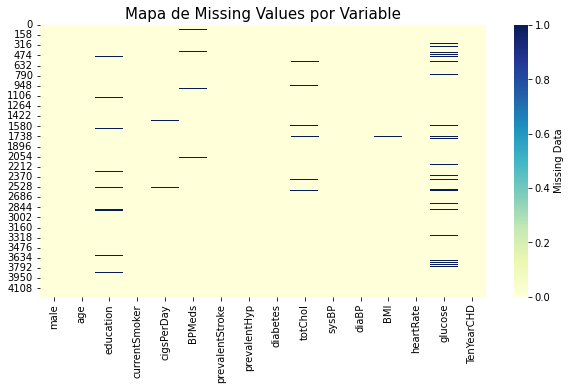

In [558]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.isna(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.title('Mapa de Missing Values por Variable', fontsize= 15)
plt.show()

**Observaciones:**
- Existen valores nulos, pero no filas nulas.
- No se observan missing values en variable Target.
- Para saber qué hacer con los registros con missing values, vamos a analizar cada variable y determinar el impacto de los valores nulos y posibles soluciones. 

####Glucosa

In [559]:
#Porcentaje de missing values
missed = df['glucose'].isna().sum()
total = df['glucose'].isna().count()
print(f'El porcentaje de missing values es de {missed/total*100:.1f}%.')

El porcentaje de missing values es de 9.2%.


Es un porcentaje alto como para borrar todas las filas con valores nullos.

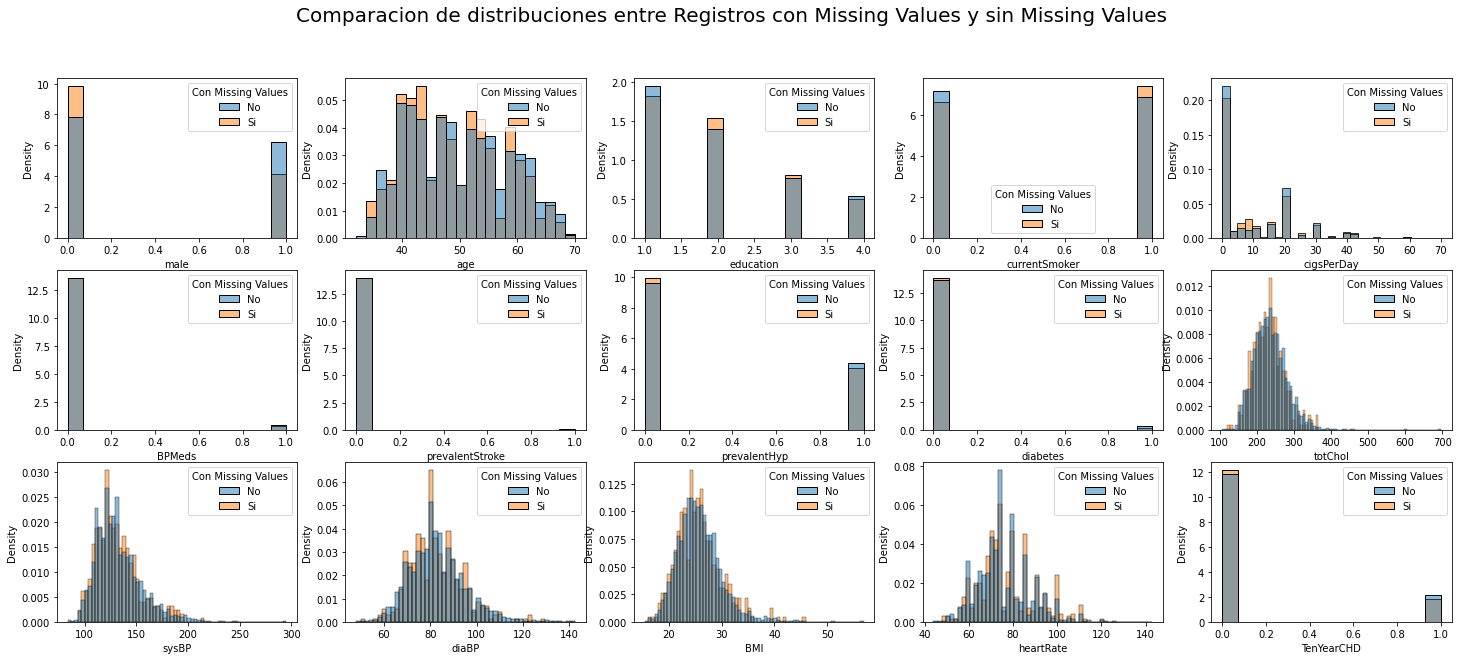

In [560]:
data = df.copy()
withMissingValues = 'Con Missing Values'
data[withMissingValues] = data['glucose'].isna().map({True:'Si', False:'No'})

fig, axes = plt.subplots(3, 5, figsize=(25, 10))

sns.histplot(ax=axes[0,0], data=data,stat= 'density', common_norm=False, x='male', hue=withMissingValues);
sns.histplot(ax=axes[0,1], data=data, stat= 'density', common_norm=False, x='age', hue=withMissingValues);
sns.histplot(ax=axes[0,2], data=data,stat= 'density', common_norm=False, x='education', hue=withMissingValues);
sns.histplot(ax=axes[0,3], data=data, stat= 'density', common_norm=False, x='currentSmoker', hue=withMissingValues);
sns.histplot(ax=axes[0,4], data=data,stat= 'density', common_norm=False, x='cigsPerDay', hue=withMissingValues);
sns.histplot(ax=axes[1,0], data=data, stat= 'density', common_norm=False, x='BPMeds', hue=withMissingValues);
sns.histplot(ax=axes[1,1], data=data,stat= 'density', common_norm=False, x='prevalentStroke', hue=withMissingValues);
sns.histplot(ax=axes[1,2], data=data, stat= 'density', common_norm=False, x='prevalentHyp', hue=withMissingValues);
sns.histplot(ax=axes[1,3], data=data,stat= 'density', common_norm=False, x='diabetes', hue=withMissingValues);
sns.histplot(ax=axes[1,4], data=data, stat= 'density', common_norm=False, x='totChol', hue=withMissingValues);
sns.histplot(ax=axes[2,0], data=data,stat= 'density', common_norm=False, x='sysBP', hue=withMissingValues);
sns.histplot(ax=axes[2,1], data=data, stat= 'density', common_norm=False, x='diaBP', hue=withMissingValues);
sns.histplot(ax=axes[2,2], data=data, stat= 'density', common_norm=False, x='BMI', hue=withMissingValues);
sns.histplot(ax=axes[2,3], data=data, stat= 'density', common_norm=False, x='heartRate', hue=withMissingValues);
sns.histplot(ax=axes[2,4], data=data, stat= 'density', common_norm=False, x='TenYearCHD', hue=withMissingValues);

plt.suptitle(t= 'Comparacion de distribuciones entre Registros con Missing Values y sin Missing Values', fontsize=20)
plt.show()

Segun se observa, las distribuciones entre los datos con valores de 'glucose' y sin estos, son similares. 
- Es poco probable que la falta de datos este relacionada a otra variable, o a la variable Traget (tenYearCHD). No se observan patrones de perdidas de datos, por lo que se suponen perdidas aleatorias.

Por este motivo se decide:
- Utilizar la Moda como valor de Imputación.


In [561]:
#por ahora los missing values se reemplazaran con la moda (mas adelante se probará un KNN)
df['glucose'] = df['glucose'].fillna(df['glucose'].mode()[0])


####Educacion

In [562]:
#Porcentaje de missing values
missed = df['education'].isna().sum()
total = df['education'].isna().count()
print(f'El porcentaje de missing values es de {missed/total*100:.1f}%.')

El porcentaje de missing values es de 2.5%.


Es un porcentaje alto de valores faltantes para adoptar una estrategia de  borrado de las filas con valores nulos.

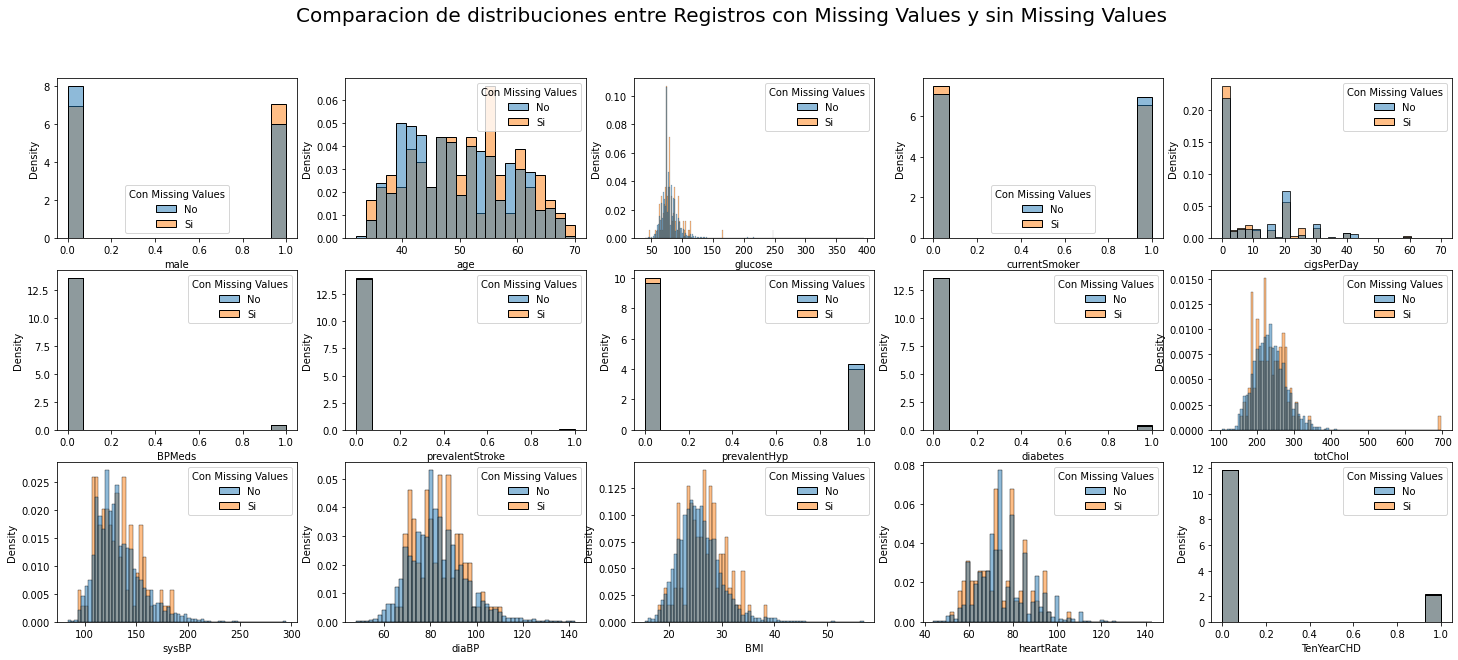

In [563]:
data = df.copy()
withMissingValues = 'Con Missing Values'
data[withMissingValues] = data['education'].isna().map({True:'Si', False:'No'})

fig, axes = plt.subplots(3, 5, figsize=(25, 10))

sns.histplot(ax=axes[0,0], data=data,stat= 'density', common_norm=False, x='male', hue=withMissingValues);
sns.histplot(ax=axes[0,1], data=data, stat= 'density', common_norm=False, x='age', hue=withMissingValues);
sns.histplot(ax=axes[0,2], data=data,stat= 'density', common_norm=False, x='glucose', hue=withMissingValues);
sns.histplot(ax=axes[0,3], data=data, stat= 'density', common_norm=False, x='currentSmoker', hue=withMissingValues);
sns.histplot(ax=axes[0,4], data=data,stat= 'density', common_norm=False, x='cigsPerDay', hue=withMissingValues);
sns.histplot(ax=axes[1,0], data=data, stat= 'density', common_norm=False, x='BPMeds', hue=withMissingValues);
sns.histplot(ax=axes[1,1], data=data,stat= 'density', common_norm=False, x='prevalentStroke', hue=withMissingValues);
sns.histplot(ax=axes[1,2], data=data, stat= 'density', common_norm=False, x='prevalentHyp', hue=withMissingValues);
sns.histplot(ax=axes[1,3], data=data,stat= 'density', common_norm=False, x='diabetes', hue=withMissingValues);
sns.histplot(ax=axes[1,4], data=data, stat= 'density', common_norm=False, x='totChol', hue=withMissingValues);
sns.histplot(ax=axes[2,0], data=data,stat= 'density', common_norm=False, x='sysBP', hue=withMissingValues);
sns.histplot(ax=axes[2,1], data=data, stat= 'density', common_norm=False, x='diaBP', hue=withMissingValues);
sns.histplot(ax=axes[2,2], data=data, stat= 'density', common_norm=False, x='BMI', hue=withMissingValues);
sns.histplot(ax=axes[2,3], data=data, stat= 'density', common_norm=False, x='heartRate', hue=withMissingValues);
sns.histplot(ax=axes[2,4], data=data, stat= 'density', common_norm=False, x='TenYearCHD', hue=withMissingValues);

plt.suptitle(t= 'Comparacion de distribuciones entre Registros con Missing Values y sin Missing Values', fontsize=20)
plt.show()

Segun se observa, las distribuciones entre los datos con valores de 'education' y sin estos, son similares. 
- Es poco probable que la falta de datos este relacionada a otra variable, o a la variable Traget (tenYearCHD). No se observan patrones de perdidas de datos, por lo que se suponen perdidas aleatorias.

Por este motivo se decide:
- Utilizar la Moda como valor de Imputación.


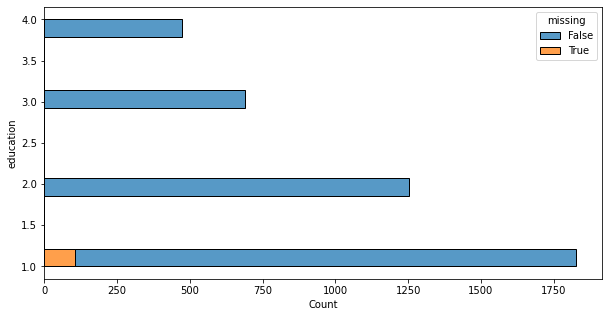

In [564]:
df_temp = df.copy()
df_temp['missing'] = df_temp['education'].isna()
#Hacemos la imputacion simple
df_temp['education'] = df_temp['education'].fillna(df_temp['education'].mode()[0])
#Distribuciones
plt.figure(figsize = (10, 5))
sns.histplot(data=df_temp, y='education', hue='missing', multiple='stack')
fig.show()

Como se ve graficamente, no hay gran impacto en la distribución de los valores de educacion.

In [565]:
#Los missing values se reemplazaran con la moda.
df['education'] = df['education'].fillna(df['education'].mode()[0])


####BPMeds

In [566]:
#Porcentaje de missing values
missed = df['BPMeds'].isna().sum()
total = df['BPMeds'].isna().count()
print(f'El porcentaje de missing values es de {missed/total*100:.1f}%.')

El porcentaje de missing values es de 1.2%.


Es un porcentaje alto de valores faltantes para adoptar una estrategia de  borrado de las filas con valores nulos.

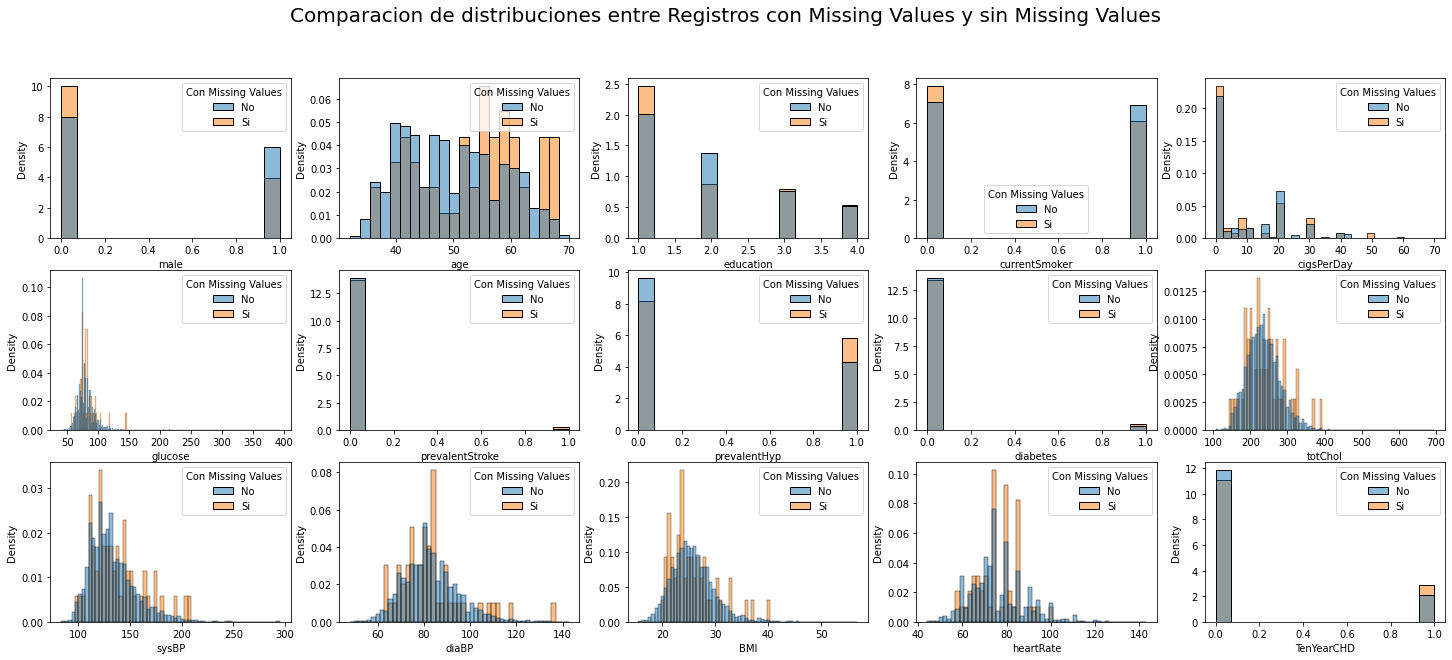

In [567]:
data = df.copy()
withMissingValues = 'Con Missing Values'
data[withMissingValues] = data['BPMeds'].isna().map({True:'Si', False:'No'})

fig, axes = plt.subplots(3, 5, figsize=(25, 10))

sns.histplot(ax=axes[0,0], data=data,stat= 'density', common_norm=False, x='male', hue=withMissingValues);
sns.histplot(ax=axes[0,1], data=data, stat= 'density', common_norm=False, x='age', hue=withMissingValues);
sns.histplot(ax=axes[0,2], data=data,stat= 'density', common_norm=False, x='education', hue=withMissingValues);
sns.histplot(ax=axes[0,3], data=data, stat= 'density', common_norm=False, x='currentSmoker', hue=withMissingValues);
sns.histplot(ax=axes[0,4], data=data,stat= 'density', common_norm=False, x='cigsPerDay', hue=withMissingValues);
sns.histplot(ax=axes[1,0], data=data, stat= 'density', common_norm=False, x='glucose', hue=withMissingValues);
sns.histplot(ax=axes[1,1], data=data,stat= 'density', common_norm=False, x='prevalentStroke', hue=withMissingValues);
sns.histplot(ax=axes[1,2], data=data, stat= 'density', common_norm=False, x='prevalentHyp', hue=withMissingValues);
sns.histplot(ax=axes[1,3], data=data,stat= 'density', common_norm=False, x='diabetes', hue=withMissingValues);
sns.histplot(ax=axes[1,4], data=data, stat= 'density', common_norm=False, x='totChol', hue=withMissingValues);
sns.histplot(ax=axes[2,0], data=data,stat= 'density', common_norm=False, x='sysBP', hue=withMissingValues);
sns.histplot(ax=axes[2,1], data=data, stat= 'density', common_norm=False, x='diaBP', hue=withMissingValues);
sns.histplot(ax=axes[2,2], data=data, stat= 'density', common_norm=False, x='BMI', hue=withMissingValues);
sns.histplot(ax=axes[2,3], data=data, stat= 'density', common_norm=False, x='heartRate', hue=withMissingValues);
sns.histplot(ax=axes[2,4], data=data, stat= 'density', common_norm=False, x='TenYearCHD', hue=withMissingValues);

plt.suptitle(t= 'Comparacion de distribuciones entre Registros con Missing Values y sin Missing Values', fontsize=20)
plt.show()

Segun se observa, las distribuciones entre los datos con valores de 'BPMeds' y sin estos, son similares. Excepto en la variable de edad, donde se observa que a mayor edad existen mas missing values.

Se decide:
- Utilizar la Moda como valor de Imputación.


In [568]:
#Los missing values se reemplazaran con la moda.
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])


####Colesterol Total            

In [569]:
#Porcentaje de missing values
missed = df['totChol'].isna().sum()
total = df['totChol'].isna().count()
print(f'El porcentaje de missing values es de {missed/total*100:.1f}%.')

El porcentaje de missing values es de 1.2%.


Es un porcentaje alto de valores faltantes para adoptar una estrategia de  borrado de las filas con valores nulos.

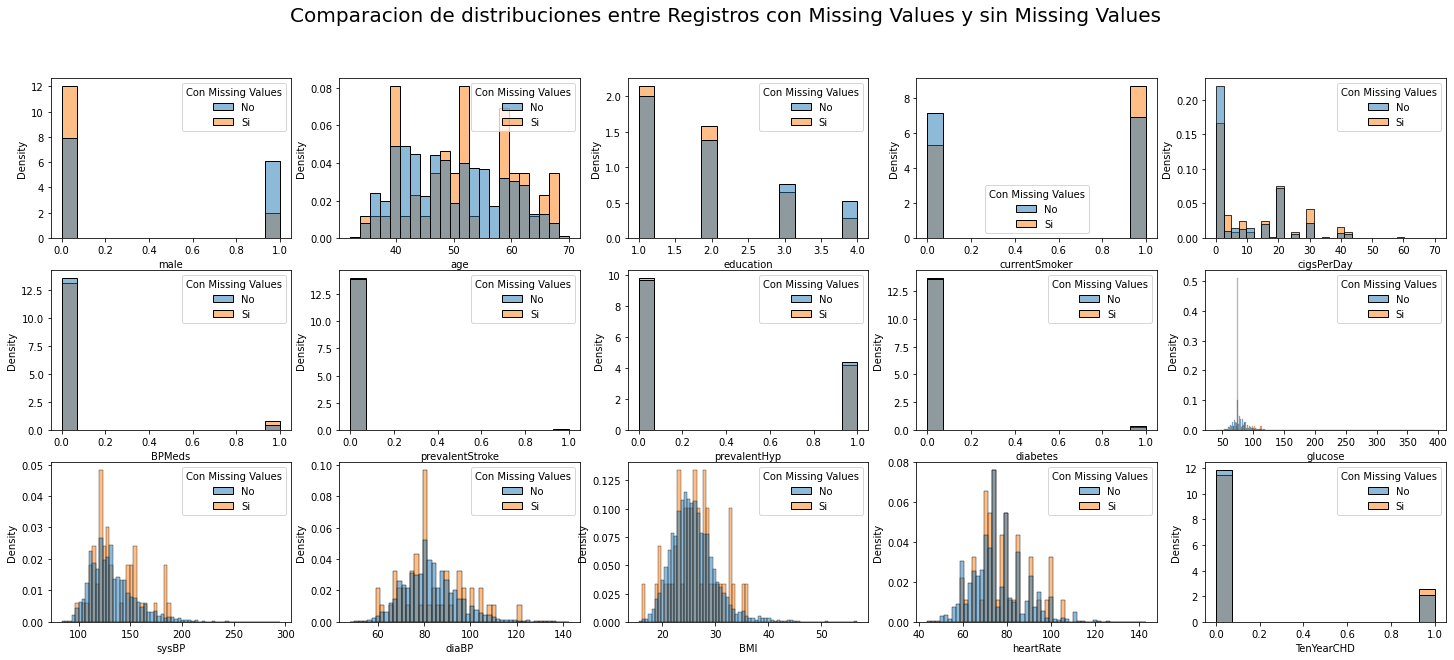

In [570]:
data = df.copy()
withMissingValues = 'Con Missing Values'
data[withMissingValues] = data['totChol'].isna().map({True:'Si', False:'No'})

fig, axes = plt.subplots(3, 5, figsize=(25, 10))

sns.histplot(ax=axes[0,0], data=data,stat= 'density', common_norm=False, x='male', hue=withMissingValues);
sns.histplot(ax=axes[0,1], data=data, stat= 'density', common_norm=False, x='age', hue=withMissingValues);
sns.histplot(ax=axes[0,2], data=data,stat= 'density', common_norm=False, x='education', hue=withMissingValues);
sns.histplot(ax=axes[0,3], data=data, stat= 'density', common_norm=False, x='currentSmoker', hue=withMissingValues);
sns.histplot(ax=axes[0,4], data=data,stat= 'density', common_norm=False, x='cigsPerDay', hue=withMissingValues);
sns.histplot(ax=axes[1,0], data=data, stat= 'density', common_norm=False, x='BPMeds', hue=withMissingValues);
sns.histplot(ax=axes[1,1], data=data,stat= 'density', common_norm=False, x='prevalentStroke', hue=withMissingValues);
sns.histplot(ax=axes[1,2], data=data, stat= 'density', common_norm=False, x='prevalentHyp', hue=withMissingValues);
sns.histplot(ax=axes[1,3], data=data,stat= 'density', common_norm=False, x='diabetes', hue=withMissingValues);
sns.histplot(ax=axes[1,4], data=data, stat= 'density', common_norm=False, x='glucose', hue=withMissingValues);
sns.histplot(ax=axes[2,0], data=data,stat= 'density', common_norm=False, x='sysBP', hue=withMissingValues);
sns.histplot(ax=axes[2,1], data=data, stat= 'density', common_norm=False, x='diaBP', hue=withMissingValues);
sns.histplot(ax=axes[2,2], data=data, stat= 'density', common_norm=False, x='BMI', hue=withMissingValues);
sns.histplot(ax=axes[2,3], data=data, stat= 'density', common_norm=False, x='heartRate', hue=withMissingValues);
sns.histplot(ax=axes[2,4], data=data, stat= 'density', common_norm=False, x='TenYearCHD', hue=withMissingValues);

plt.suptitle(t= 'Comparacion de distribuciones entre Registros con Missing Values y sin Missing Values', fontsize=20)
plt.show()

Segun se observa, las distribuciones entre los datos con valores de 'totChol' y sin estos, son similares. Excepto en la variable sexo, donde se observa que para las mujeres existen mas missing values.

Se decide:
- Utilizar la Moda como valor de Imputación.


In [571]:
#Los missing values se reemplazaran con la moda.
df['totChol'] = df['totChol'].fillna(df['totChol'].mode()[0])


####Cigarrillos por Dia

In [572]:
#Porcentaje de missing values
missed = df['cigsPerDay'].isna().sum()
total = df['cigsPerDay'].isna().count()
print(f'El porcentaje de missing values es de {missed/total*100:.1f}%.')

El porcentaje de missing values es de 0.7%.


Es un porcentaje alto de valores faltantes para adoptar una estrategia de  borrado de las filas con valores nulos.

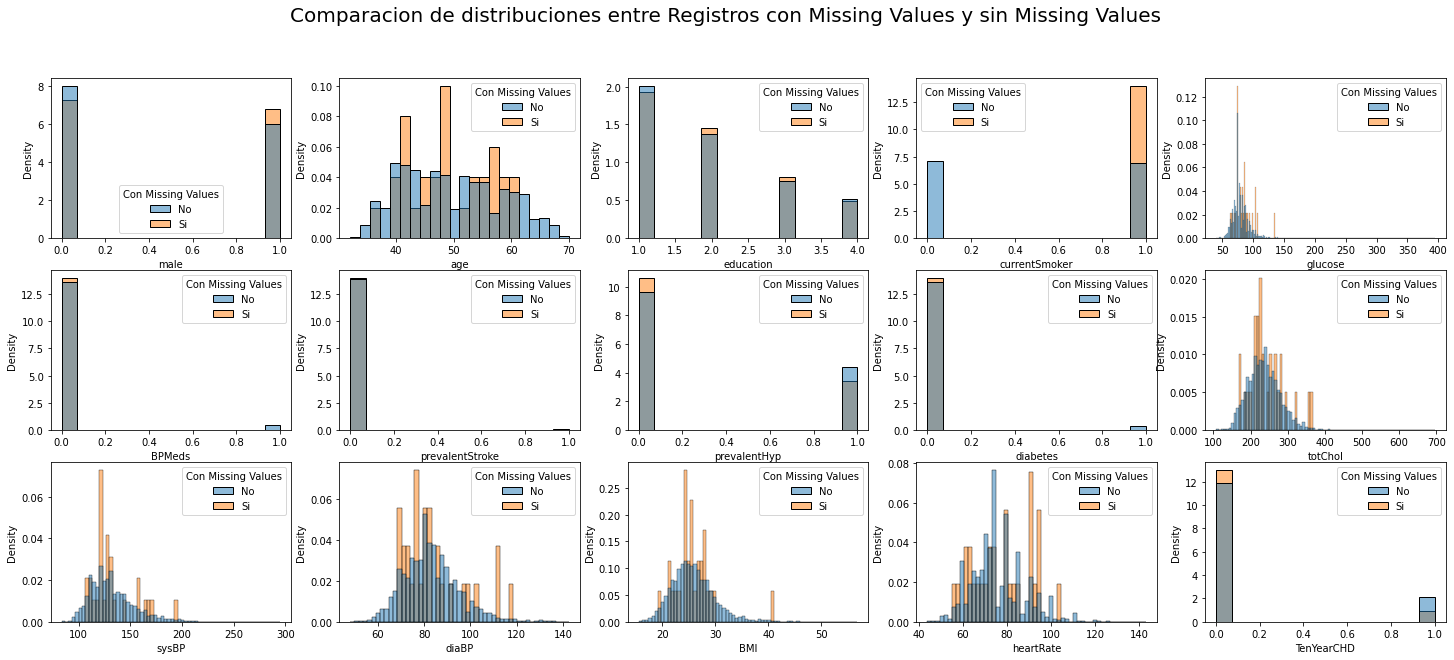

In [573]:
data = df.copy()
withMissingValues = 'Con Missing Values'
data[withMissingValues] = data['cigsPerDay'].isna().map({True:'Si', False:'No'})

fig, axes = plt.subplots(3, 5, figsize=(25, 10))

sns.histplot(ax=axes[0,0], data=data,stat= 'density', common_norm=False, x='male', hue=withMissingValues);
sns.histplot(ax=axes[0,1], data=data, stat= 'density', common_norm=False, x='age', hue=withMissingValues);
sns.histplot(ax=axes[0,2], data=data,stat= 'density', common_norm=False, x='education', hue=withMissingValues);
sns.histplot(ax=axes[0,3], data=data, stat= 'density', common_norm=False, x='currentSmoker', hue=withMissingValues);
sns.histplot(ax=axes[0,4], data=data,stat= 'density', common_norm=False, x='glucose', hue=withMissingValues);
sns.histplot(ax=axes[1,0], data=data, stat= 'density', common_norm=False, x='BPMeds', hue=withMissingValues);
sns.histplot(ax=axes[1,1], data=data,stat= 'density', common_norm=False, x='prevalentStroke', hue=withMissingValues);
sns.histplot(ax=axes[1,2], data=data, stat= 'density', common_norm=False, x='prevalentHyp', hue=withMissingValues);
sns.histplot(ax=axes[1,3], data=data,stat= 'density', common_norm=False, x='diabetes', hue=withMissingValues);
sns.histplot(ax=axes[1,4], data=data, stat= 'density', common_norm=False, x='totChol', hue=withMissingValues);
sns.histplot(ax=axes[2,0], data=data,stat= 'density', common_norm=False, x='sysBP', hue=withMissingValues);
sns.histplot(ax=axes[2,1], data=data, stat= 'density', common_norm=False, x='diaBP', hue=withMissingValues);
sns.histplot(ax=axes[2,2], data=data, stat= 'density', common_norm=False, x='BMI', hue=withMissingValues);
sns.histplot(ax=axes[2,3], data=data, stat= 'density', common_norm=False, x='heartRate', hue=withMissingValues);
sns.histplot(ax=axes[2,4], data=data, stat= 'density', common_norm=False, x='TenYearCHD', hue=withMissingValues);

plt.suptitle(t= 'Comparacion de distribuciones entre Registros con Missing Values y sin Missing Values', fontsize=20)
plt.show()

Segun se observa, las distribuciones entre los datos con valores de 'cigsPerDay' y sin estos, son similares. Excepto en la variable de fumador actual. Claramente las dos variables estan relacionadas.

Se decide:
- Utilizar la Moda, sin incluir a los currentSmoker=0, como valor de Imputación.


In [574]:
#Hallamos la moda para currentSmoker=1
moda_fumadores = df[df['currentSmoker']==1]['cigsPerDay'].mode()[0]
#Los missing values se reemplazaran con la moda.
df['cigsPerDay'] = df['cigsPerDay'].fillna(moda_fumadores)


####BMI

In [575]:
#Porcentaje de missing values
missed = df['BMI'].isna().sum()
total = df['BMI'].isna().count()
print(f'El porcentaje de missing values es de {missed/total*100:.1f}%.')

El porcentaje de missing values es de 0.4%.


Es un porcentaje alto de valores faltantes para adoptar una estrategia de  borrado de las filas con valores nulos.

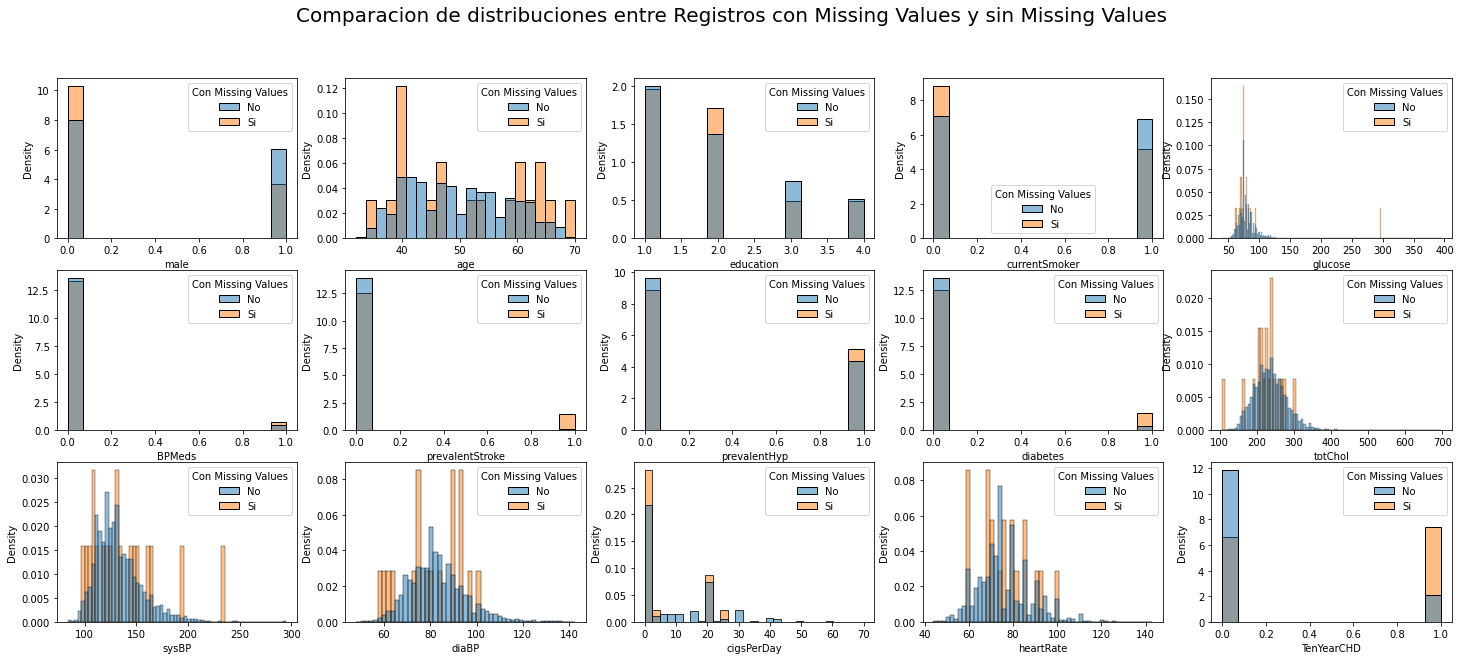

In [576]:
data = df.copy()
withMissingValues = 'Con Missing Values'
data[withMissingValues] = data['BMI'].isna().map({True:'Si', False:'No'})

fig, axes = plt.subplots(3, 5, figsize=(25, 10))

sns.histplot(ax=axes[0,0], data=data,stat= 'density', common_norm=False, x='male', hue=withMissingValues);
sns.histplot(ax=axes[0,1], data=data, stat= 'density', common_norm=False, x='age', hue=withMissingValues);
sns.histplot(ax=axes[0,2], data=data,stat= 'density', common_norm=False, x='education', hue=withMissingValues);
sns.histplot(ax=axes[0,3], data=data, stat= 'density', common_norm=False, x='currentSmoker', hue=withMissingValues);
sns.histplot(ax=axes[0,4], data=data,stat= 'density', common_norm=False, x='glucose', hue=withMissingValues);
sns.histplot(ax=axes[1,0], data=data, stat= 'density', common_norm=False, x='BPMeds', hue=withMissingValues);
sns.histplot(ax=axes[1,1], data=data,stat= 'density', common_norm=False, x='prevalentStroke', hue=withMissingValues);
sns.histplot(ax=axes[1,2], data=data, stat= 'density', common_norm=False, x='prevalentHyp', hue=withMissingValues);
sns.histplot(ax=axes[1,3], data=data,stat= 'density', common_norm=False, x='diabetes', hue=withMissingValues);
sns.histplot(ax=axes[1,4], data=data, stat= 'density', common_norm=False, x='totChol', hue=withMissingValues);
sns.histplot(ax=axes[2,0], data=data,stat= 'density', common_norm=False, x='sysBP', hue=withMissingValues);
sns.histplot(ax=axes[2,1], data=data, stat= 'density', common_norm=False, x='diaBP', hue=withMissingValues);
sns.histplot(ax=axes[2,2], data=data, stat= 'density', common_norm=False, x='cigsPerDay', hue=withMissingValues);
sns.histplot(ax=axes[2,3], data=data, stat= 'density', common_norm=False, x='heartRate', hue=withMissingValues);
sns.histplot(ax=axes[2,4], data=data, stat= 'density', common_norm=False, x='TenYearCHD', hue=withMissingValues);

plt.suptitle(t= 'Comparacion de distribuciones entre Registros con Missing Values y sin Missing Values', fontsize=20)
plt.show()

Segun se observa, las distribuciones entre los datos con valores de 'BMI' y sin estos, son similares. Excepto en la variable Target. 

Se decide:
- Utilizar la Moda (considerando solo TenYearCHD=1) como valor de Imputación.


In [577]:
#Hallamos la moda para TenYearCHD=1
moda_enfermos = df[df['TenYearCHD']==1]['BMI'].mode()[0]
#Los missing values se reemplazaran con la moda.
df['BMI'] = df['BMI'].fillna(moda_fumadores)


####Frecuencia Cardíaca

In [578]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [579]:
#Porcentaje de missing values
missed = df['heartRate'].isna().sum()
total = df['heartRate'].isna().count()
print(f'El porcentaje de missing values es de {missed/total*100:.1f}%.')

El porcentaje de missing values es de 0.0%.


Es un porcentaje insignificante de valores faltantes, por lo que se decide el  borrado de las filas con valores nulos.

In [580]:
df.dropna(subset=['heartRate'], inplace=True)

###Tipo de datos

In [581]:
#Analizamos el tipo de dato de cada columna
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

Aparecen tipos de datos que no consideramos adecuados:
- education: No es correcto que figure como float. Deberia ser int u Object.
- cigsPerDay: No es correcto que figure como float. Deberia ser int.
- BPMeds: No es correcto que figure como float. Deberia ser int.


####Educacion

El tipo de dato no es el esperado. Lo vamos a a convertir en entero. Representa una secuencia. 

In [582]:
#Converimos en Entero
df['education'] = df['education'].astype('int')

In [583]:
education_dict = {
    1.0:'0-11 years',
    2.0:'High School Diploma',
    3.0:'Vocational School',
    4.0:'College degre or more'
}
#if df['education'].dtype=='float64':
#  df['education'] = df['education'].map(education_dict)


####Cigarrillos por Dia
Se espera que el tipo de dato sea un entero.

In [584]:
#Converimos en Entero
df['cigsPerDay'] = df['cigsPerDay'].astype('int')

####BPMeds
Se espera que sea entero o categórico.

In [585]:
#Converimos en Entero
df['BPMeds'] = df['BPMeds'].astype('int')

##Screening inicial de los datos


In [586]:
#Data Profiling
#profile = pandas_profiling.ProfileReport(df)
#profile

In [587]:
df1 = df[['male','age', 'education', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
#sns.pairplot(data=df1, hue = 'TenYearCHD' , palette = 'Set2')

**Insigths:**

*   male:
  *   Mayor proporcion de enfermos en hombres.
  *   Los hombres fuman mayor cantidad de cigarrillos.
*   Age:
  *   A mayor edad, hay mas cantidad de enfermos cardiacos.
  *   A mayor edad, se fuman mayor cantidad de cigarrillos (pocos cigarrillos a edades tempranas).
  *   A edades mayores de 30 años se comienzan a tomar medicamentos para enfermedades cardiacas.
  *   A edades mayores de 30 años comienzan a aparecer ACVs.
  *   A edades menores a 30 años es menos frecuente ver presiones sistólicas elevadas.
  *   A edades mayores de 30 años comienzan a aparecer valores altos de glusemia.
*   Cantidad de cigarrillos por dia:
  *   La gente que toma medicamentos para el corazon fuma menos.
  *   los pacientes que sufrieron un ACV fuman menor cantidad de cigarrillos.
  *   Es menos probable que loss pacientes fumen si tienen elevado la glucemia, el BMI, la presion diastolica, la presion sistolica y el colesterol.
*   Pacientes sufrieron ACVs:
  *   Es menos probable observar gente que sufra ACVs con elevado colesterol total, con elevado colesterol total, con elevados niveles de glucemia y elevada frecuencia cardiaca.
*   Colesterol total:
  *   Se obsereva una correlacion lineal debil con las presiones sistolicas y diastolicas, asi como tambien con el BMI.
*   Presion sistolica: 
  *   Se observa una correlacion con la presion diaastolica.
  *   Se observa una correlacion debil con el BMI.
*   Presion diastolica: 
  *   Se observa una correlacion debil con el BMI.




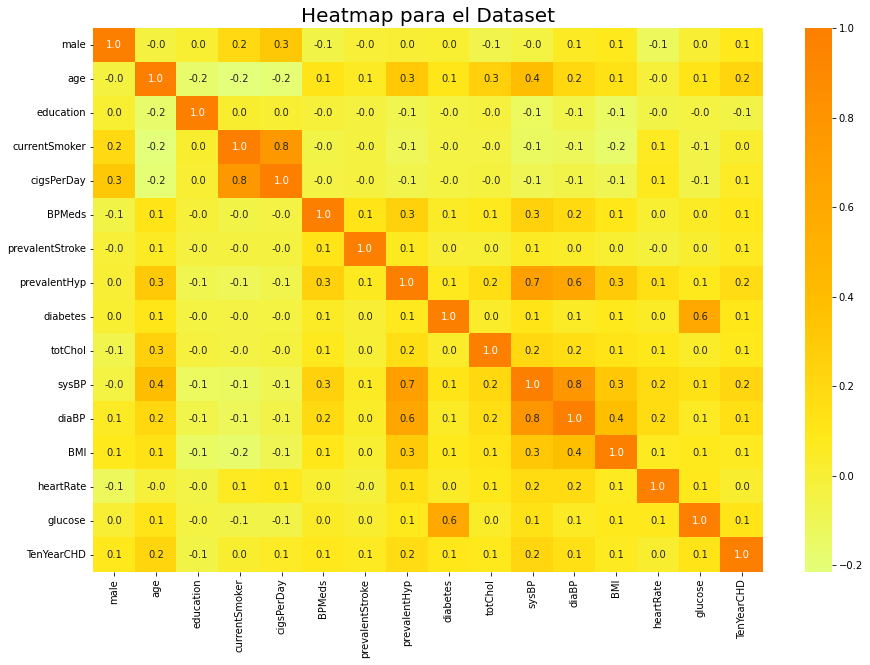

In [588]:
#Correlacion entre las variables
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia', fmt='.1f')
plt.title('Heatmap para el Dataset', fontsize = 20)
plt.show()

**Insights:** 

Se observan que estan fuertemente correlacionadas las siguientes variables:

1.   currentSmoker y cigsPerDay: la relacion se entiende porque cantidad de cigarrillos mayor a cero es una parte de la definicion de Fumador. Se podría pensar en sacar del modelo a currentSmoker.
2.   sysBP y prevalentHyp: la relacion se entiende porque presion sistolica elevada es parte de la definicion de hipertension. Se podría pensar en sacar del modelo a prevalentHyp.
3.   diaBP y prevalentHyp: la relacion se entiende porque presion diastolica elevada es parte de la definicion de hipertension. Se podría pensar en sacar del modelo a prevalentHyp.
3.   glucose y diabetes: la relacion se entiende porque la glucosa elevada es parte de la definicion de diabetes. Se podría pensar en sacar del modelo a diabetes.
3.   sysBP y diaBP.


##Analisis de Variables

###Sexo

####Distribución

###Glucosa



####Distribución

moda:  75.0
mediana:  77.0
media:  81.3241330502477


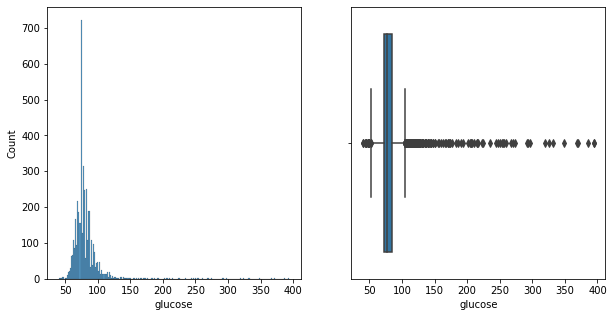

In [589]:
#Distribucion de la glucosa
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], data=df, x='glucose');
sns.boxplot(ax=axes[1], data=df, x='glucose');
fig.show()
print('moda: ', df['glucose'].mode()[0])
print('mediana: ', df['glucose'].median())
print('media: ', df['glucose'].mean())

- Se observa gran cantidad de outliers
- Se observa una asimetría positiva de la distribución



#####Prueba excluyendo Outliers

moda:  75.0
mediana:  76.0
media:  77.74000502891627


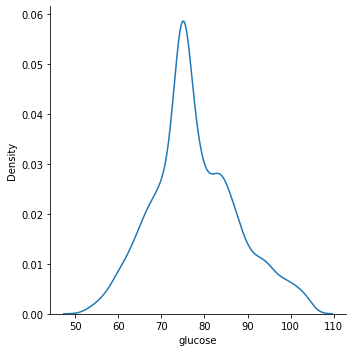

In [590]:
#Excluimos los valores Outlaiers del grafico para observar mejor la distribución
Q1 = df['glucose'].quantile(0.25)
Q3 = df['glucose'].quantile(0.75)
RIC = Q3 - Q1 
Lmin = Q1 - 1.5 * RIC
Lmax = Q3 + 1.5 * RIC

data = df['glucose'].loc[lambda x : (x <=Lmax) & (x >=Lmin)]
sns.displot(data=data, kind='kde')
print('moda: ', data.mode()[0])
print('mediana: ', data.median())
print('media: ', data.mean())

Observaciones:
- No sigue una distribución Normal al sacar los outliers, aunque se aproxima.

###Educacion



####Distribución

moda:  1


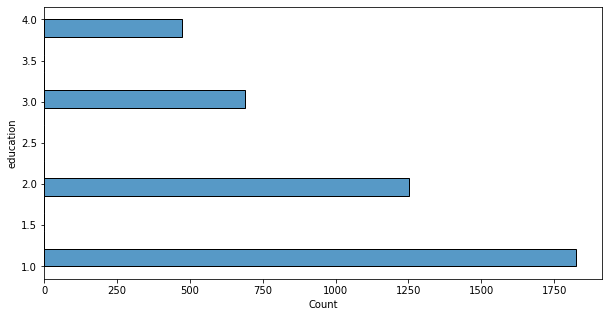

In [591]:
#Distribucion de la educacion
plt.figure(figsize = (10, 5))
sns.histplot(data=df, y='education');

fig.show()
print('moda: ', df['education'].mode()[0])


####Relacion con otras Variables


##### Educacion - Edad

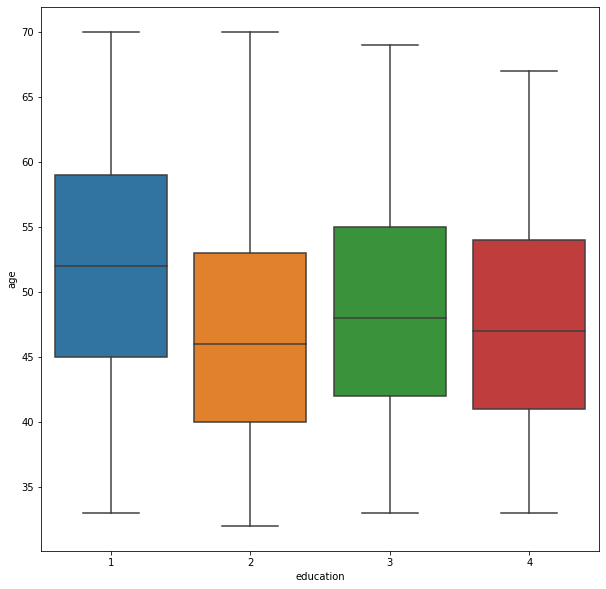

In [592]:
#Analisis de la relacion entre education y age
plt.figure(figsize = (10, 10))
sns.boxplot(y = 'age', x = 'education', data = df)
plt.show()

<Figure size 720x720 with 0 Axes>

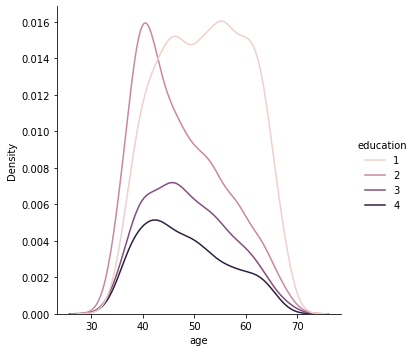

In [593]:
plt.figure(figsize = (10, 10))
sns.displot(x= 'age', hue= 'education', data = df, kind="kde")
plt.show()

###Edad

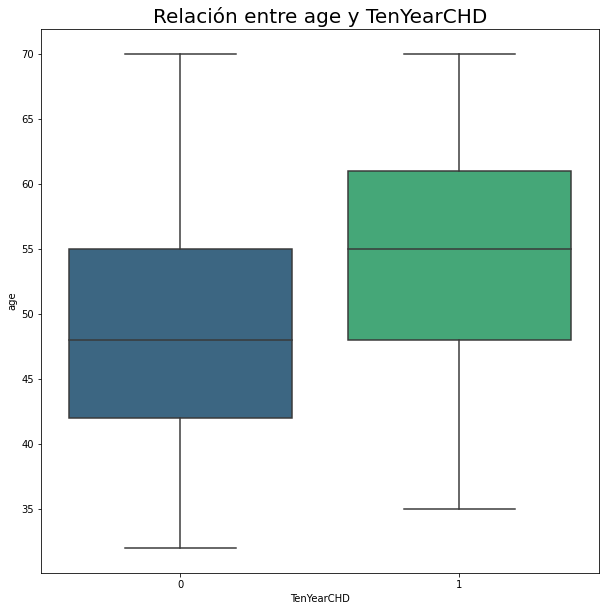

In [594]:
#Analisis de la relacion age vs TenYearCHD
plt.figure(figsize = (10, 10))
sns.boxplot(y=df['age'], x=df['TenYearCHD'], palette = 'viridis')
plt.title('Relación entre age y TenYearCHD', fontsize = 20)
plt.show()

**Edad:** se observa que los pacientes que tienen mas probabilidad de desarrollar una enfermedad cardiaca (tenYearCHD) son aquellos de mayort edad.

###Presión Sistólica

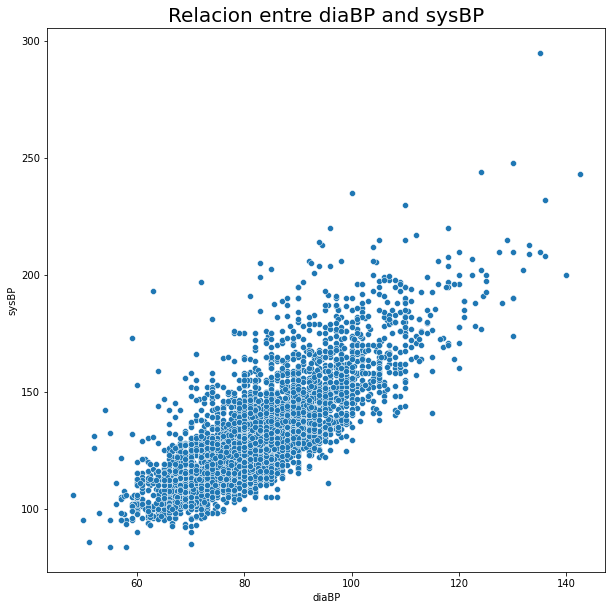

In [595]:
#Analisis de la relacion entre diaBP y sysBP
plt.figure(figsize = (10, 10))
sns.scatterplot(x="diaBP", y="sysBP", data=df)
plt.title('Relacion entre diaBP and sysBP', fontsize = 20, fontweight = 30)
plt.show();

Se observa que efectivamente hay una relacion entre la presion diastolica (diaBP) y la presion sistolica (sysBP) de tipo positiva, en donde si hay un incremento de la presion diastolica tambien hay un incremento de la presion sistolica.

###Cigarrillos por Dia


###TenYearCHD (Variable Target)


In [596]:
#Balance de datos
target = df.groupby('TenYearCHD')['male'].count()
target

TenYearCHD
0    3596
1     643
Name: male, dtype: int64

In [597]:
target[0]

3596

In [598]:
#Relacion
relacion = target[1] / target.sum()
print(f'La relacion entre prevalencia de enfermedades cardiacas es de {relacion*100:.1f}%.')

La relacion entre prevalencia de enfermedades cardiacas es de 15.2%.


**Observaciones:**
- Los datos estan desbalanceados.

##Analisis Multivariado

#Primera Iteración

##Resumen de operaciones realizadas al dataset original


In [683]:
url = 'https://raw.githubusercontent.com/MatiasRogani/FraminghamStudy/main/framingham.csv'
df = pd.read_csv(url)

#Imputaciones Missing Values
df['glucose'] = df['glucose'].fillna(df['glucose'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['totChol'] = df['totChol'].fillna(df['totChol'].mode()[0])
df['totChol'] = df['totChol'].fillna(df['totChol'].mode()[0])
moda_fumadores = df[df['currentSmoker']==1]['cigsPerDay'].mode()[0]
df['cigsPerDay'] = df['cigsPerDay'].fillna(moda_fumadores)
moda_enfermos = df[df['TenYearCHD']==1]['BMI'].mode()[0]
df['BMI'] = df['BMI'].fillna(moda_fumadores)
df.dropna(subset=['heartRate'], inplace=True)

df['education'] = df['education'].astype('int')
df['cigsPerDay'] = df['cigsPerDay'].astype('int')
df['BPMeds'] = df['BPMeds'].astype('int')




##Datos listos para aplicar los modelos

In [600]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [601]:
df.dtypes

male                 int64
age                  int64
education            int64
currentSmoker        int64
cigsPerDay           int64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [602]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4239.0,0.429111,0.495008,0.00,0.00,0.00,1.000,1.0
age,4239.0,49.576787,8.571091,32.00,42.00,49.00,56.000,70.0
education,4239.0,1.955414,1.018537,1.00,1.00,2.00,3.000,4.0
currentSmoker,4239.0,0.493984,0.500023,0.00,0.00,0.00,1.000,1.0
cigsPerDay,4239.0,9.079028,11.916737,0.00,0.00,0.00,20.000,70.0
BPMeds,4239.0,0.029252,0.168532,0.00,0.00,0.00,0.000,1.0
prevalentStroke,4239.0,0.005898,0.076578,0.00,0.00,0.00,0.000,1.0
prevalentHyp,4239.0,0.310451,0.462733,0.00,0.00,0.00,1.000,1.0
diabetes,4239.0,0.025714,0.158298,0.00,0.00,0.00,0.000,1.0
totChol,4239.0,236.742628,44.333346,107.00,206.00,234.00,262.000,696.0


##Modelos de Clasificación

###KNN


####Primera aproximación al Modelo

In [603]:
#Separamos en X e y
X = df.drop(["TenYearCHD"], axis=1)
y = df["TenYearCHD"]


In [604]:
#Escalado de los Datos
escalador = MinMaxScaler()
X = escalador.fit_transform(X)

In [605]:
#Separamos en train y test
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [606]:
#Creacion del modelo
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(X_train, y_train);

In [607]:
#Prediccion en Train
y_train_pred = clasificador.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('% de aciertos sobre el set de entrenamiento:',train_accuracy)


#Prediccion en Test
y_test_pred = clasificador.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.8843950117964273
% de aciertos sobre el set de evaluación: 0.8160377358490566


**Observaciones**
- No se observa una caida apreciable en la Exactitud del modelo, por lo que se descarta fenomenos de underfitting o overfitting.
- Esta metrica no es adecuada para comparar Modelos, ya que nuestros datos estan desbalanceados.

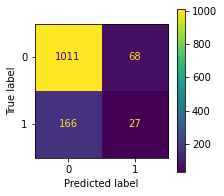

In [608]:
#Creamos la matriz de Confusión

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Matriz de Confusión
matriz = confusion_matrix(y_test, y_test_pred)

#Ploteamos la Matriz
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
fig, ax = plt.subplots(figsize=(3,3))
display.plot(ax=ax)
plt.show()

In [609]:
from sklearn.metrics import precision_score

# Precision
print(f"Precision Score para el clasificador es: {precision_score(y_test, y_test_pred):0.2f}")

Precision Score para el clasificador es: 0.28


In [610]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score para el clasificador es: {recall_score(y_test, y_test_pred):0.2f}")

Recall Score para el clasificador es: 0.14


La precisión es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos positivos (FP). 

El Recall es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos negativos (FN).

**Insigths:**
- En nuestra problematica, tiene mas impacto no considerar a un paciente como "de Riesgo" cuando realmente lo es, que considerar a un paciente como "de Riesgo" y que no lo sea. Esto esta relacionado a la naturaleza del problema, en donde se está adelantando a la enfermedad, con un enfoque de prevención. En donde la seleccion de Features esta relacionado a Hábitos de vida que pueden cambiarse o modificarse en los pacientes, y en donde estos cambios no generan un perjuicio al paciente, ni mayores costos al sistema de salud. Mientras que no identificar un paciente como de riesgo, puede derivar en que el paciente termine desarrollando una enfermedad cardiaca, con todos los trastornos que significa para el paciente y acarreando altos costos para el sistema de salud, todos los cuales podrían haber sido evitados. En este caso lo que tratamos de hacer es reducir los Falsos Negativos. Por este motivo, debemos usar el recall como métrica para medir la calidad de nuestro clasificador, en lugar de la Precisión.
- Se observa un bajo score de Recall. Sospechamos que se debe a que tenemos desbalanceadas las categorias Target. En la proxima iteración se va a trabajar sobre este problema.

In [611]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score para el clasificador es: {f1_score(y_test, y_test_pred)}")

F1 Score para el clasificador es: 0.1875


AUC for our classifier is: 0.6000830744260421


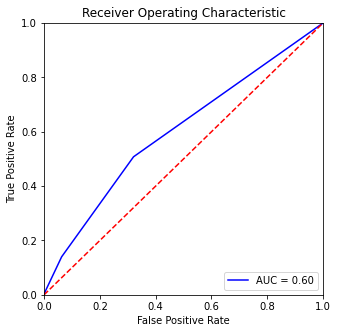

In [503]:
#CURVA - ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = clasificador.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.figure(figsize = (5, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####Optimización del Modelo (Hiperparametros)

Se buscará manualmente los hiperparametros que mejor ajusten según las metricas obtenidas. 

In [504]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc


Metricas = {}

for k in range(1,10,1):
  #Creacion del modelo
  clasificador = KNeighborsClassifier(n_neighbors=k)
  
  clasificador.fit(X_train, y_train);

  #Prediccion en Test
  y_test_pred = clasificador.predict(X_test)
  
  #Calculo para ROC
  class_probabilities = clasificador.predict_proba(X_test)
  preds = class_probabilities[:, 1]
  fpr, tpr, threshold = roc_curve(y_test, preds)


  Metricas[k] = {
      'k': k,
      'Exactitud': accuracy_score(y_test, y_test_pred),
      'Precision': precision_score(y_test, y_test_pred),
      'Recall': recall_score(y_test, y_test_pred),
      'F1score': f1_score(y_test, y_test_pred),
      'AUCroc': auc(fpr, tpr)
      }

  Metricas[k] = {
      'k': k,
      'Exactitud': accuracy_score(y_test, y_test_pred),
      'Precision': precision_score(y_test, y_test_pred),
      'Recall': recall_score(y_test, y_test_pred),
      'F1score': f1_score(y_test, y_test_pred),
      'AUCroc': auc(fpr, tpr)
      }

Metricas = pd.DataFrame(Metricas).T
Metricas = Metricas.melt(id_vars=['k'], value_vars=['Exactitud', 'Precision', 'Recall', 'F1score', 'AUCroc'], value_name='Score', var_name='Indicador')



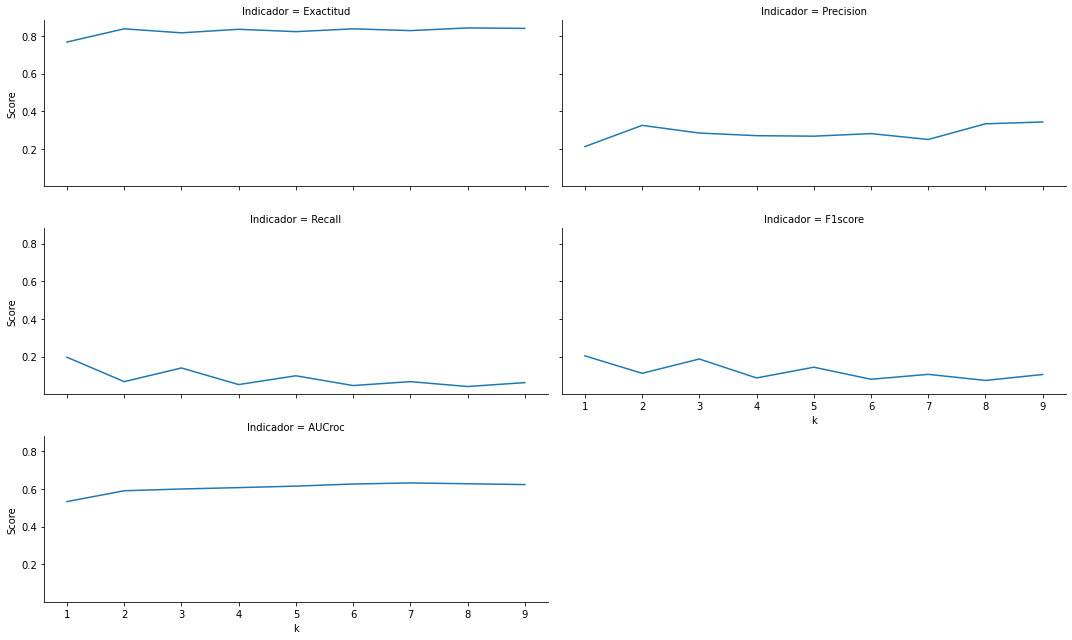

In [505]:
g = sns.FacetGrid(data=Metricas,col="Indicador", col_wrap=2, aspect=2.5)
g.map(sns.lineplot, 'k', 'Score')

#sns.relplot(kind='line', data= Metricas, y= 'Score', x='k', col='Indicador');


**Observaciones:**

En esta primera iteración vemos que nuestra metrica elegida para evaluar el modelo, el Recall, es baja para todos los k evaluados.

Ningun modelo es optimo para nuestro problema, pero para fines comparativos se elegirá a k=3 como el mejor, por ser el de mejor F1score (considerando que los datos estan desbalanceados), uno de los mejores Recall y una exactitud suficiente. 

Se debe seguir trabajando con los datos para mejorar el modelo.

###Logistic Regresion

####Primera aproximación al Modelo

In [506]:
#Separamos en X e y
X = df.drop(["TenYearCHD"], axis=1)
y = df["TenYearCHD"]


In [507]:
#Escalado de los Datos
escalador = MinMaxScaler()
X = escalador.fit_transform(X)

In [508]:
#Separamos en train y test
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [509]:
#Creacion del modelo
clasificador = LogisticRegression()

clasificador.fit(X_train, y_train);

In [510]:
#Prediccion en Train
y_train_pred = clasificador.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('% de aciertos sobre el set de entrenamiento:',train_accuracy)


#Prediccion en Test
y_test_pred = clasificador.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.8554095045500506
% de aciertos sobre el set de evaluación: 0.8522012578616353


Se observa un buen rendimiento en los dos sets.

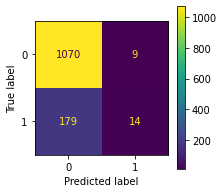

In [511]:
#Creamos la matriz de Confusión

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Matriz de Confusión
matriz = confusion_matrix(y_test, y_test_pred)

#Ploteamos la Matriz
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
fig, ax = plt.subplots(figsize=(3,3))
display.plot(ax=ax)
plt.show()

In [512]:
from sklearn.metrics import precision_score

# Precision
print(f"Precision Score para el clasificador es: {precision_score(y_test, y_test_pred):0.2f}")

Precision Score para el clasificador es: 0.61


In [513]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score para el clasificador es: {recall_score(y_test, y_test_pred):0.2f}")

Recall Score para el clasificador es: 0.07


La precisión es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos positivos (FP). 

El Recall es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos negativos (FN).

**Insigths:**
- En nuestra problematica, tiene mas impacto no considerar a un paciente como "de Riesgo" cuando realmente lo es, que considerar a un paciente como "de Riesgo" y que no lo sea. Esto esta relacionado a la naturaleza del problema, en donde se está adelantando a la enfermedad, con un enfoque de prevención. En donde la seleccion de Features esta relacionado a Hábitos de vida que pueden cambiarse o modificarse en los pacientes, y en donde estos cambios no generan un perjuicio al paciente, ni mayores costos al sistema de salud. Mientras que no identificar un paciente como de riesgo, puede derivar en que el paciente termine desarrollando una enfermedad cardiaca, con todos los trastornos que significa para el paciente y acarreando altos costos para el sistema de salud, todos los cuales podrían haber sido evitados. En este caso lo que tratamos de hacer es reducir los Falsos Negativos. Por este motivo, debemos usar el recall como métrica para medir la calidad de nuestro clasificador, en lugar de la Precisión.
- Se observa un bajo score de Recall. Sospechamos que se debe a que tenemos desbalanceadas las categorias Target. En la proxima iteración se va a trabajar sobre este problema.

In [514]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score para el clasificador es: {f1_score(y_test, y_test_pred)}")

F1 Score para el clasificador es: 0.12962962962962962


AUC for our classifier is: 0.7373599619682396


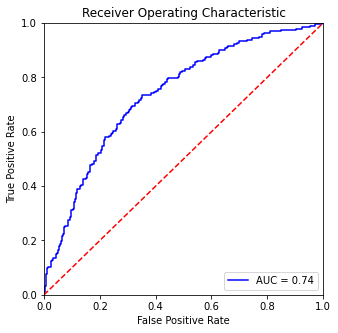

In [515]:
#CURVA - ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = clasificador.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.figure(figsize = (5, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####Optimización del Modelo (Hiperparametros)

Se buscará manualmente los hiperparametros que mejor ajusten según las metricas obtenidas. 

In [516]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc


Metricas = {}

for C in np.arange(0.1,5,0.2):
  #Creacion del modelo
  clasificador = LogisticRegression(C=C)
  
  clasificador.fit(X_train, y_train);

  #Prediccion en Test
  y_test_pred = clasificador.predict(X_test)
  
  #Calculo para ROC
  class_probabilities = clasificador.predict_proba(X_test)
  preds = class_probabilities[:, 1]
  fpr, tpr, threshold = roc_curve(y_test, preds)


  Metricas[C] = {
      'C': C,
      'Exactitud': accuracy_score(y_test, y_test_pred),
      'Precision': precision_score(y_test, y_test_pred),
      'Recall': recall_score(y_test, y_test_pred),
      'F1score': f1_score(y_test, y_test_pred),
      'AUCroc': auc(fpr, tpr)
      }


Metricas = pd.DataFrame(Metricas).T
Metricas = Metricas.melt(id_vars=['C'], value_vars=['Exactitud', 'Precision', 'Recall', 'F1score', 'AUCroc'], value_name='Score', var_name='Indicador')



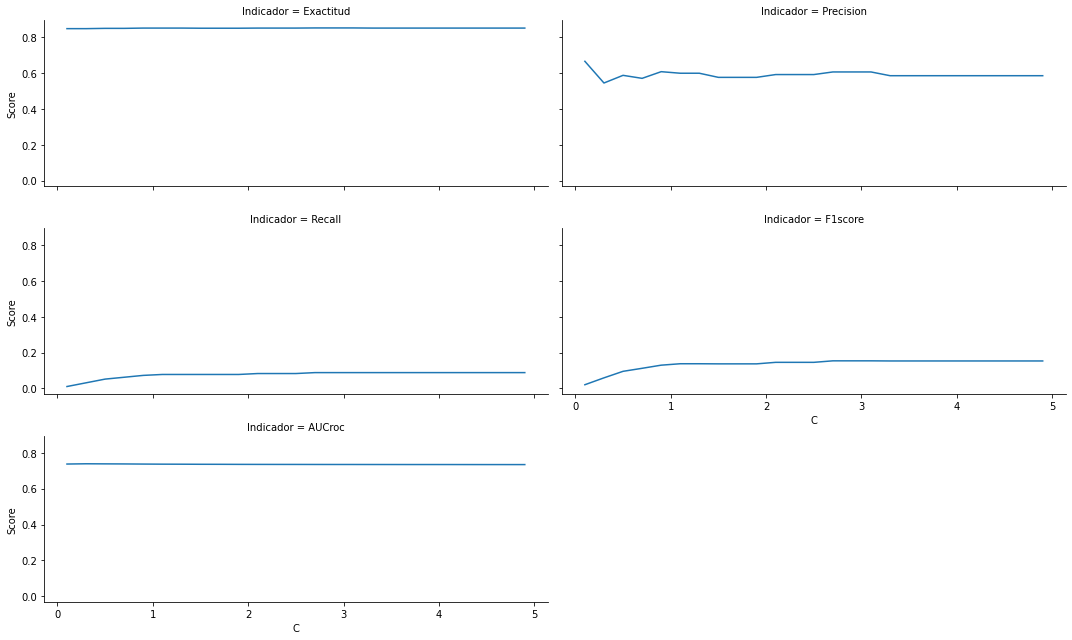

In [517]:
g = sns.FacetGrid(data=Metricas,col="Indicador", col_wrap=2, aspect=2.5)
g.map(sns.lineplot, 'C', 'Score')

#sns.relplot(kind='line', data= Metricas, y= 'Score', x='k', col='Indicador');


**Observaciones:**

En esta primera iteración vemos que nuestra metrica elegida para evaluar el modelo, el Recall, es baja para todos los k evaluados.

Ningun modelo es optimo para nuestro problema, pero para fines comparativos se elegirá a C=1 como el mejor, por ser el de mejor F1score (considerando que los datos estan desbalanceados), uno de los mejores Recall y una exactitud suficiente. 

Se debe seguir trabajando con los datos para mejorar el modelo.

###Desicion Tree


####Primera aproximación al Modelo

In [684]:
#Separamos en X e y
X = df.drop(["TenYearCHD"], axis=1)
y = df["TenYearCHD"]


In [685]:
#Separamos en train y test
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [686]:
#Creacion del modelo
clasificador = DecisionTreeClassifier(max_depth=3, random_state=11)

clasificador.fit(X_train, y_train);

In [687]:
#Prediccion en Train
y_train_pred = clasificador.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('% de aciertos sobre el set de entrenamiento:',train_accuracy)


#Prediccion en Test
y_test_pred = clasificador.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.8523761375126391
% de aciertos sobre el set de evaluación: 0.8466981132075472


No parece que estuvieramos en un caso de OverFitting. En principio, buenas metricas.

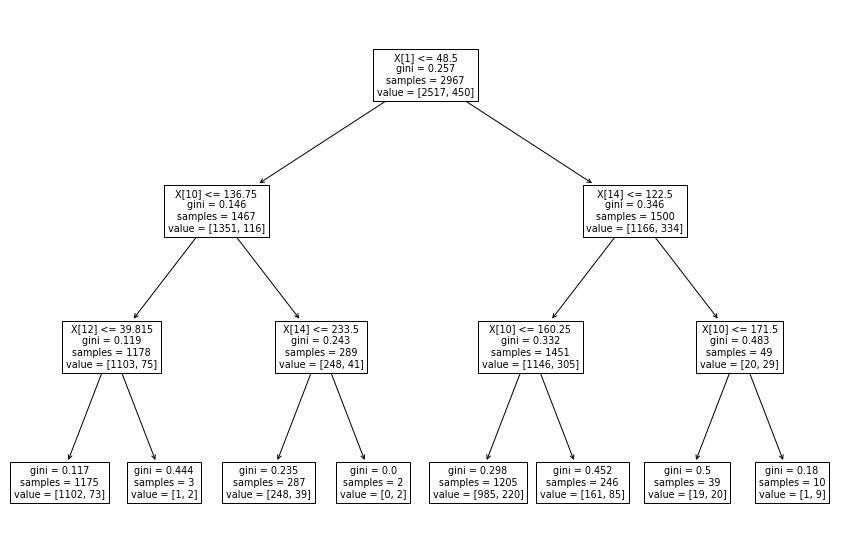

In [688]:
tree.plot_tree(clasificador);

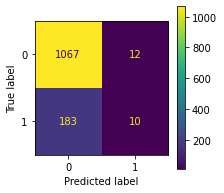

In [689]:
#Creamos la matriz de Confusión

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Matriz de Confusión
matriz = confusion_matrix(y_test, y_test_pred)

#Ploteamos la Matriz
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
fig, ax = plt.subplots(figsize=(3,3))
display.plot(ax=ax)
plt.show()

In [690]:
from sklearn.metrics import precision_score

# Precision
print(f"Precision Score para el clasificador es: {precision_score(y_test, y_test_pred):0.2f}")

Precision Score para el clasificador es: 0.45


In [691]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score para el clasificador es: {recall_score(y_test, y_test_pred):0.2f}")

Recall Score para el clasificador es: 0.05


La precisión es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos positivos (FP). 

El Recall es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos negativos (FN).

**Insigths:**
- En nuestra problematica, tiene mas impacto no considerar a un paciente como "de Riesgo" cuando realmente lo es, que considerar a un paciente como "de Riesgo" y que no lo sea. Esto esta relacionado a la naturaleza del problema, en donde se está adelantando a la enfermedad, con un enfoque de prevención. En donde la seleccion de Features esta relacionado a Hábitos de vida que pueden cambiarse o modificarse en los pacientes, y en donde estos cambios no generan un perjuicio al paciente, ni mayores costos al sistema de salud. Mientras que no identificar un paciente como de riesgo, puede derivar en que el paciente termine desarrollando una enfermedad cardiaca, con todos los trastornos que significa para el paciente y acarreando altos costos para el sistema de salud, todos los cuales podrían haber sido evitados. En este caso lo que tratamos de hacer es reducir los Falsos Negativos. Por este motivo, debemos usar el recall como métrica para medir la calidad de nuestro clasificador, en lugar de la Precisión.
- Se observa un bajo score de Recall. Sospechamos que se debe a que tenemos desbalanceadas las categorias Target. En la proxima iteración se va a trabajar sobre este problema.

In [692]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score para el clasificador es: {f1_score(y_test, y_test_pred)}")

F1 Score para el clasificador es: 0.09302325581395349


AUC for our classifier is: 0.6725523056754719


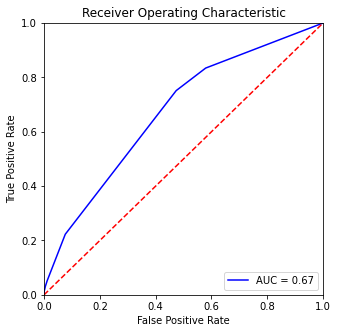

In [693]:
#CURVA - ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = clasificador.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.figure(figsize = (5, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####Optimización del Modelo (Hiperparametros)

Se buscará manualmente los hiperparametros que mejor ajusten según las metricas obtenidas. 

#####max_depth

In [700]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc


Metricas = {}

for max_depth in range(1,10,1):
  #Creacion del modelo
  clasificador = DecisionTreeClassifier(max_depth=max_depth, random_state=11)
  
  clasificador.fit(X_train, y_train);

  #Prediccion en Test
  y_test_pred = clasificador.predict(X_test)
  
  #Calculo para ROC
  class_probabilities = clasificador.predict_proba(X_test)
  preds = class_probabilities[:, 1]
  fpr, tpr, threshold = roc_curve(y_test, preds)


  Metricas[max_depth] = {
      'max_depth': max_depth,
      'Exactitud': accuracy_score(y_test, y_test_pred),
      'Precision': precision_score(y_test, y_test_pred),
      'Recall': recall_score(y_test, y_test_pred),
      'F1score': f1_score(y_test, y_test_pred),
      'AUCroc': auc(fpr, tpr)
      }


Metricas = pd.DataFrame(Metricas).T
Metricas = Metricas.melt(id_vars=['max_depth'], value_vars=['Exactitud', 'Precision', 'Recall', 'F1score', 'AUCroc'], value_name='Score', var_name='Indicador')



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


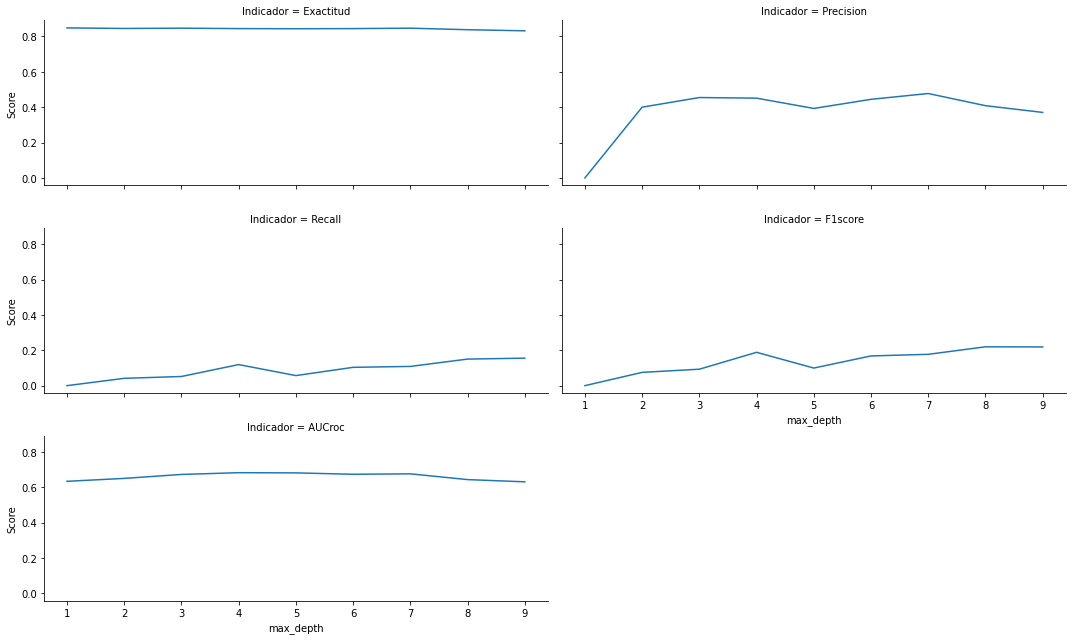

In [701]:
g = sns.FacetGrid(data=Metricas,col="Indicador", col_wrap=2, aspect=2.5)
g.map(sns.lineplot, 'max_depth', 'Score')

#sns.relplot(kind='line', data= Metricas, y= 'Score', x='k', col='Indicador');


**Observaciones:**

En esta primera iteración vemos que nuestra metrica elegida para evaluar el modelo, el Recall, es baja para todos los k evaluados.

Ningun modelo es optimo para nuestro problema, pero para fines comparativos se elegirá a max_depth=4 como el mejor, por ser el de mejor F1score (considerando que los datos estan desbalanceados), uno de los mejores Recall y una exactitud suficiente. 

Se debe seguir trabajando con los datos para mejorar el modelo.

#####class_weight

In [696]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc


Metricas = {}

for class_weight in [None, 'balanced']:
  #Creacion del modelo
  clasificador = DecisionTreeClassifier(max_depth=4, class_weight=class_weight, random_state=11)
  
  clasificador.fit(X_train, y_train);

  #Prediccion en Test
  y_test_pred = clasificador.predict(X_test)
  
  #Calculo para ROC
  class_probabilities = clasificador.predict_proba(X_test)
  preds = class_probabilities[:, 1]
  fpr, tpr, threshold = roc_curve(y_test, preds)

  if class_weight==None: 
    class_weight = 'None'

  Metricas[class_weight] = {
      'class_weight': class_weight,
      'Exactitud': accuracy_score(y_test, y_test_pred),
      'Precision': precision_score(y_test, y_test_pred),
      'Recall': recall_score(y_test, y_test_pred),
      'F1score': f1_score(y_test, y_test_pred),
      'AUCroc': auc(fpr, tpr)
      }


Metricas = pd.DataFrame(Metricas).T
Metricas = Metricas.melt(id_vars=['class_weight'], value_vars=['Exactitud', 'Precision', 'Recall', 'F1score', 'AUCroc'], value_name='Score', var_name='Indicador')



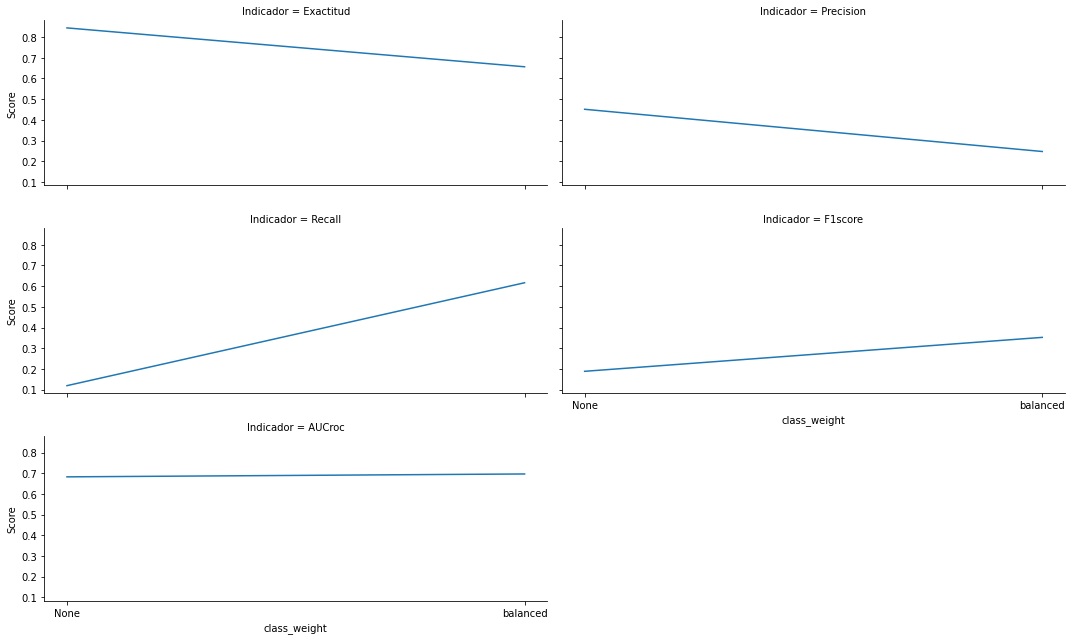

In [697]:
g = sns.FacetGrid(data=Metricas,col="Indicador", col_wrap=2, aspect=2.5)
g.map(sns.lineplot, 'class_weight', 'Score')

#sns.relplot(kind='line', data= Metricas, y= 'Score', x='k', col='Indicador');


**Observaciones:**

En esta primera iteración vemos que nuestra metrica elegida para evaluar el modelo, el Recall, aumenta mucho cuando el modelo tiene la capacidad de compensar la clase desbalanceada (class_weight=balanced).

Para fines comparativos se elegirá class_weight=balanced como el mejor seteo del modelo, por mejorar las metricas de Recall con una exactitud suficiente. 

Se debe seguir trabajando con los datos para mejorar el modelo. Es clave resolver el problema del desbalance en la variable target.

###Random Forest

####Primera aproximación al Modelo

In [530]:
#Separamos en X e y
X = df.drop(["TenYearCHD"], axis=1)
y = df["TenYearCHD"]


In [531]:
#Separamos en train y test
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [532]:
#Creacion del modelo
clasificador = RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=20, random_state=11)

clasificador.fit(X_train, y_train);

In [533]:
#Prediccion en Train
y_train_pred = clasificador.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('% de aciertos sobre el set de entrenamiento:',train_accuracy)


#Prediccion en Test
y_test_pred = clasificador.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.9905628581058308
% de aciertos sobre el set de evaluación: 0.845125786163522


Se observa una caida del rendimiento. Se sospecha Overfitting.

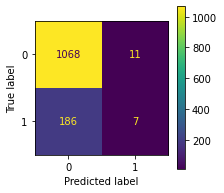

In [534]:
#Creamos la matriz de Confusión

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Matriz de Confusión
matriz = confusion_matrix(y_test, y_test_pred)

#Ploteamos la Matriz
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
fig, ax = plt.subplots(figsize=(3,3))
display.plot(ax=ax)
plt.show()

In [535]:
from sklearn.metrics import precision_score

# Precision
print(f"Precision Score para el clasificador es: {precision_score(y_test, y_test_pred):0.2f}")

Precision Score para el clasificador es: 0.39


In [536]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score para el clasificador es: {recall_score(y_test, y_test_pred):0.2f}")

Recall Score para el clasificador es: 0.04


La precisión es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos positivos (FP). 

El Recall es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos negativos (FN).

**Insigths:**
- En nuestra problematica, tiene mas impacto no considerar a un paciente como "de Riesgo" cuando realmente lo es, que considerar a un paciente como "de Riesgo" y que no lo sea. Esto esta relacionado a la naturaleza del problema, en donde se está adelantando a la enfermedad, con un enfoque de prevención. En donde la seleccion de Features esta relacionado a Hábitos de vida que pueden cambiarse o modificarse en los pacientes, y en donde estos cambios no generan un perjuicio al paciente, ni mayores costos al sistema de salud. Mientras que no identificar un paciente como de riesgo, puede derivar en que el paciente termine desarrollando una enfermedad cardiaca, con todos los trastornos que significa para el paciente y acarreando altos costos para el sistema de salud, todos los cuales podrían haber sido evitados. En este caso lo que tratamos de hacer es reducir los Falsos Negativos. Por este motivo, debemos usar el recall como métrica para medir la calidad de nuestro clasificador, en lugar de la Precisión.
- Se observa un bajo score de Recall. Sospechamos que se debe a que tenemos desbalanceadas las categorias Target. En la proxima iteración se va a trabajar sobre este problema.

In [537]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score para el clasificador es: {f1_score(y_test, y_test_pred)}")

F1 Score para el clasificador es: 0.06635071090047392


AUC for our classifier is: 0.6746339683164704


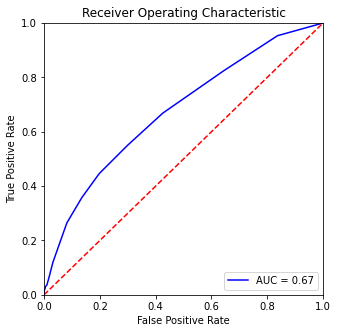

In [538]:
#CURVA - ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = clasificador.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.figure(figsize = (5, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####Optimización del Modelo (Hiperparametros)

Se buscará manualmente los hiperparametros que mejor ajusten según las metricas obtenidas. 

#####n_estimators

In [539]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc


Metricas = {}

for n_estimators in range(10,100,10):
  #Creacion del modelo
  clasificador = RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=n_estimators, random_state=11)
  
  clasificador.fit(X_train, y_train);

  #Prediccion en Test
  y_test_pred = clasificador.predict(X_test)
  
  #Calculo para ROC
  class_probabilities = clasificador.predict_proba(X_test)
  preds = class_probabilities[:, 1]
  fpr, tpr, threshold = roc_curve(y_test, preds)


  Metricas[n_estimators] = {
      'n_estimators': n_estimators,
      'Exactitud': accuracy_score(y_test, y_test_pred),
      'Precision': precision_score(y_test, y_test_pred),
      'Recall': recall_score(y_test, y_test_pred),
      'F1score': f1_score(y_test, y_test_pred),
      'AUCroc': auc(fpr, tpr)
      }


Metricas = pd.DataFrame(Metricas).T
Metricas = Metricas.melt(id_vars=['n_estimators'], value_vars=['Exactitud', 'Precision', 'Recall', 'F1score', 'AUCroc'], value_name='Score', var_name='Indicador')



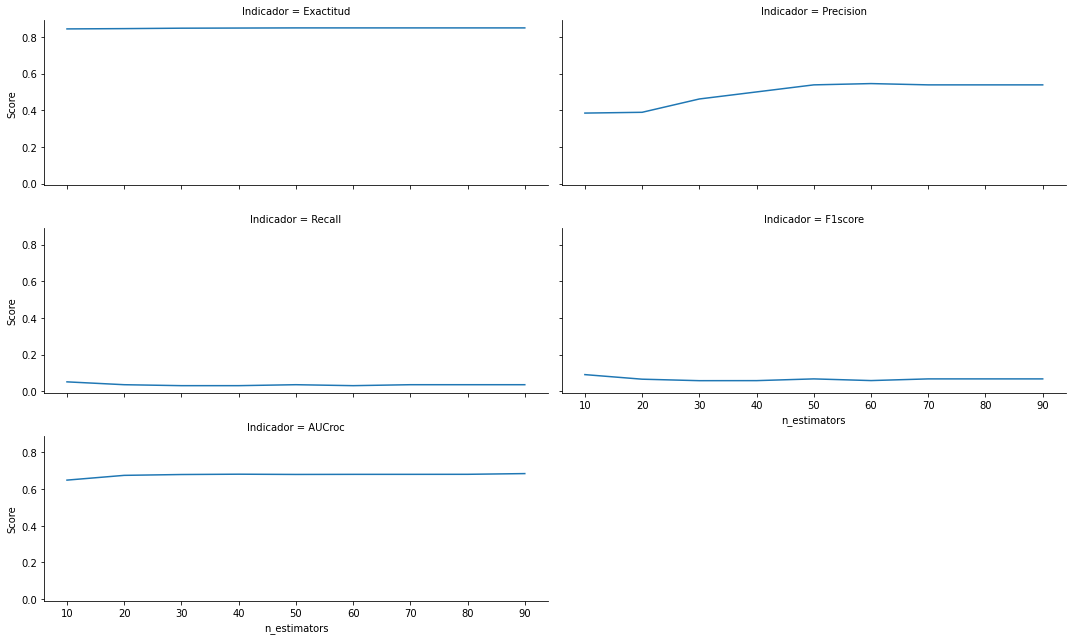

In [540]:
g = sns.FacetGrid(data=Metricas,col="Indicador", col_wrap=2, aspect=2.5)
g.map(sns.lineplot, 'n_estimators', 'Score')

#sns.relplot(kind='line', data= Metricas, y= 'Score', x='k', col='Indicador');


**Observaciones:**

En esta primera iteración vemos que nuestra metrica elegida para evaluar el modelo, el Recall, es baja para todos los k evaluados.

Ningun modelo es optimo para nuestro problema, pero para fines comparativos se elegirá a n_estimatiors=50 como el mejor, por ser el de mejor F1score (considerando que los datos estan desbalanceados), uno de los mejores Recall y una exactitud suficiente. 

Se debe seguir trabajando con los datos para mejorar el modelo.

#Segunda Iteración (Proxima Entrega)

##Resumen de operaciones realizadas al dataset original


In [671]:
url = 'https://raw.githubusercontent.com/MatiasRogani/FraminghamStudy/main/framingham.csv'
df = pd.read_csv(url)

#Imputaciones Missing Values
df['glucose'] = df['glucose'].fillna(df['glucose'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['totChol'] = df['totChol'].fillna(df['totChol'].mode()[0])
df['totChol'] = df['totChol'].fillna(df['totChol'].mode()[0])
moda_fumadores = df[df['currentSmoker']==1]['cigsPerDay'].mode()[0]
df['cigsPerDay'] = df['cigsPerDay'].fillna(moda_fumadores)
moda_enfermos = df[df['TenYearCHD']==1]['BMI'].mode()[0]
df['BMI'] = df['BMI'].fillna(moda_fumadores)
df.dropna(subset=['heartRate'], inplace=True)

df['education'] = df['education'].astype('int')
df['cigsPerDay'] = df['cigsPerDay'].astype('int')
df['BPMeds'] = df['BPMeds'].astype('int')





In [672]:
#Separamos en X e y
X = df.drop(["TenYearCHD"], axis=1)
y = df["TenYearCHD"]


In [673]:
#Escalado de los Datos
for column in X.columns:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())

In [674]:
#Separamos en train y test
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [675]:
#Realizamos un Balanceo de los datos 

from sklearn.utils import resample

df_train = pd.concat([X_train, y_train], axis=1)
df_minority_class = df_train[df_train['TenYearCHD']==1]
df_majority_class = df_train[df_train['TenYearCHD']==0]

# Rebalanceamos clase target (es minoritaria)
df_minority_class_upsampled = resample(df_minority_class, 
                                 replace=True,    # sample with replacement
                                 n_samples= df_majority_class.shape[0] - df_minority_class.shape[0], # to match majority class
                                 random_state=123)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_class_upsampled, df_majority_class])

X_train = df_upsampled.drop(["TenYearCHD"], axis=1)
y_train = df_upsampled["TenYearCHD"]


In [676]:
#Creacion del modelo
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(X_train, y_train);

In [677]:
#Prediccion en Train
y_train_pred = clasificador.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('% de aciertos sobre el set de entrenamiento:',train_accuracy)


#Prediccion en Test
y_test_pred = clasificador.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.9367364746945899
% de aciertos sobre el set de evaluación: 0.7240566037735849


**Observaciones:**

Se observa una caida de performance. Posiblemente por el balanceo del set de entrenamiento. 

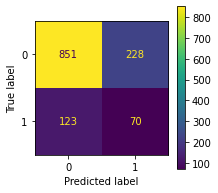

In [678]:
#Creamos la matriz de Confusión

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Matriz de Confusión
matriz = confusion_matrix(y_test, y_test_pred)

#Ploteamos la Matriz
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
fig, ax = plt.subplots(figsize=(3,3))
display.plot(ax=ax)
plt.show()

In [679]:
from sklearn.metrics import precision_score

# Precision
print(f"Precision Score para el clasificador es: {precision_score(y_test, y_test_pred):0.2f}")

Precision Score para el clasificador es: 0.23


In [680]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score para el clasificador es: {recall_score(y_test, y_test_pred):0.2f}")

Recall Score para el clasificador es: 0.36


####Optimización del Modelo (Hiperparametros)

Se buscará manualmente los hiperparametros que mejor ajusten según las metricas obtenidas. 

In [681]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc


Metricas = {}

for k in range(1,20,1):
  #Creacion del modelo
  clasificador = KNeighborsClassifier(n_neighbors=k)
  
  clasificador.fit(X_train, y_train);

  #Prediccion en Test
  y_test_pred = clasificador.predict(X_test)
  
  #Calculo para ROC
  class_probabilities = clasificador.predict_proba(X_test)
  preds = class_probabilities[:, 1]
  fpr, tpr, threshold = roc_curve(y_test, preds)


  Metricas[k] = {
      'k': k,
      'Exactitud': accuracy_score(y_test, y_test_pred),
      'Precision': precision_score(y_test, y_test_pred),
      'Recall': recall_score(y_test, y_test_pred),
      'F1score': f1_score(y_test, y_test_pred),
      'AUCroc': auc(fpr, tpr)
      }

  Metricas[k] = {
      'k': k,
      'Exactitud': accuracy_score(y_test, y_test_pred),
      'Precision': precision_score(y_test, y_test_pred),
      'Recall': recall_score(y_test, y_test_pred),
      'F1score': f1_score(y_test, y_test_pred),
      'AUCroc': auc(fpr, tpr)
      }

Metricas = pd.DataFrame(Metricas).T
Metricas = Metricas.melt(id_vars=['k'], value_vars=['Exactitud', 'Precision', 'Recall', 'F1score', 'AUCroc'], value_name='Score', var_name='Indicador')



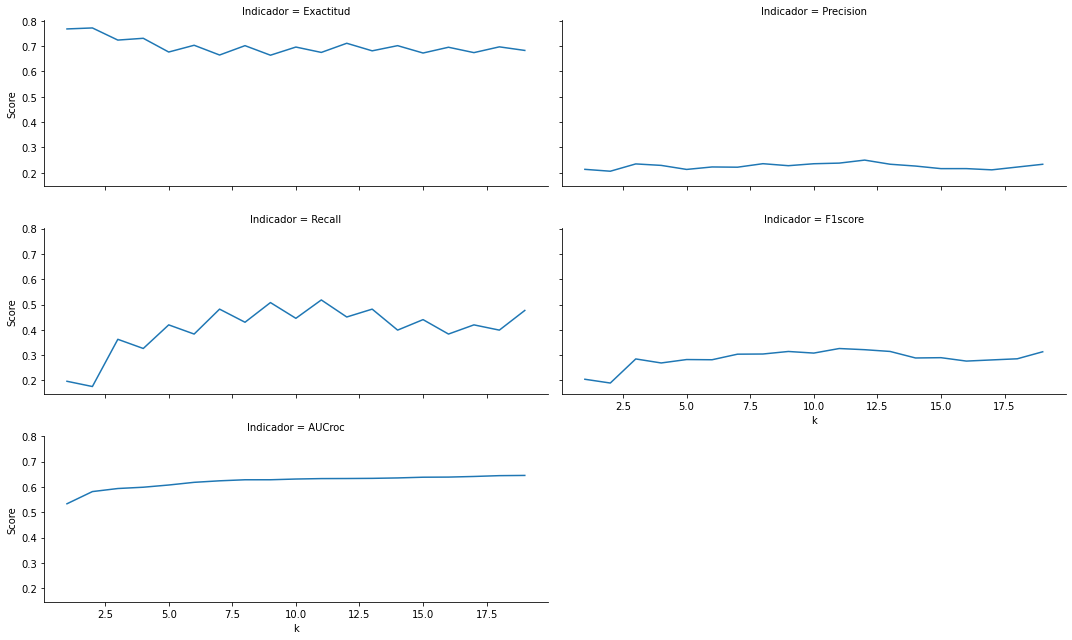

In [682]:
g = sns.FacetGrid(data=Metricas,col="Indicador", col_wrap=2, aspect=2.5)
g.map(sns.lineplot, 'k', 'Score')

#sns.relplot(kind='line', data= Metricas, y= 'Score', x='k', col='Indicador');


**Observaciones:**

En esta segunda iteración vemos que nuestra metrica elegida para evaluar el modelo, el Recall, mejoró mucho debido al balanceo de los datos.

Se observa que para nuestra metrica elegida, el Recall, el mejor modelo se observa con k = 11.
Tambien se observa a k=11 el mejor F1 Score.
La exactitud cae a valores de 0.65 aproximadamente, pero no es un mal valor, teniendo en cuenta que optimizamos muestra metrica objetivo.

Se debe seguir trabajando con los datos para mejorar el modelo.

##Referencias
(1) [Framingham Heart Study. Web oficial](https://www.framinghamheartstudy.org/)

(2) https://es.wikipedia.org/wiki/Estudio_de_Framingham

(3) https://biolincc.nhlbi.nih.gov/teaching/

(4) https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset

